In [1]:
import json
import numpy as np
import pandas as pd
import random
import glob
from __future__ import division
import re
from bs4 import BeautifulSoup
import itertools

In [2]:
with open("/Users/zuaibshaikh/Desktop/SEM 4/Applied Research Project/Client Dataset/lb_client_behaviour_files/111576.1618021558.json", "r") as infile:
    test_1=json.load(infile)
    
print(test_1)

{'sessions': [{'sessionId': '1618021557', 'deviceCategory': 'tablet', 'platform': 'iOS', 'dataSource': 'web', 'activities': [{'activityTime': '2021-04-10T02:26:36.945902Z', 'source': 'google', 'medium': 'organic', 'channelGrouping': 'Organic Search', 'campaign': '(not set)', 'keyword': 'np - /pages/terms-conditions', 'hostname': 'litboutique.com', 'landingPagePath': '/', 'activityType': 'EVENT', 'customDimension': [{'index': 1}], 'event': {'eventCategory': 'Justuno', 'eventAction': 'Targeted Overlay', 'eventLabel': 'PS: Holiday Sale 2020 - Up to 80 Off - Banner - Desktop', 'eventCount': '1'}}, {'activityTime': '2021-04-10T02:26:35.773923Z', 'source': 'google', 'medium': 'organic', 'channelGrouping': 'Organic Search', 'campaign': '(not set)', 'keyword': 'np - /pages/terms-conditions', 'hostname': 'litboutique.com', 'landingPagePath': '/', 'activityType': 'PAGEVIEW', 'customDimension': [{'index': 1}], 'pageview': {'pagePath': '/pages/terms-conditions', 'pageTitle': '(not set)'}}, {'activ

In [3]:
from pandas.io.json import json_normalize
test_2 = json_normalize(test_1, record_path = ['sessions', 'activities'], 
                       meta = [['sessions', 'sessionDate'], ['sessions', 'deviceCategory'], 
                               ['sessions', 'platform'], ['sessions', 'dataSource']])
test_2

<ipython-input-3-9eb3a1b659cc>:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  test_2 = json_normalize(test_1, record_path = ['sessions', 'activities'],


activityTime  source   medium channelGrouping   campaign  \
0  2021-04-10T02:26:36.945902Z  google  organic  Organic Search  (not set)   
1  2021-04-10T02:26:35.773923Z  google  organic  Organic Search  (not set)   
2  2021-04-10T02:26:35.767529Z  google  organic  Organic Search  (not set)   
3  2021-04-10T02:26:28.873687Z  google  organic  Organic Search  (not set)   
4  2021-04-10T02:26:27.773581Z  google  organic  Organic Search  (not set)   
5  2021-04-10T02:26:27.731727Z  google  organic  Organic Search  (not set)   
6  2021-04-10T02:26:04.216511Z  google  organic  Organic Search  (not set)   
7  2021-04-10T02:25:57.836863Z  google  organic  Organic Search  (not set)   
8  2021-04-10T02:25:57.835551Z  google  organic  Organic Search  (not set)   

                        keyword         hostname landingPagePath activityType  \
0  np - /pages/terms-conditions  litboutique.com               /        EVENT   
1  np - /pages/terms-conditions  litboutique.com               /     PAGEVIEW   
2  np - /pages/terms-conditions  litboutique.com               /     PAGEVIEW   
3        np - /pages/contact-us  litboutique.com               /        EVENT   
4        np - /pages/contact-us  litboutique.com               /     PAGEVIEW   
5        np - /pages/contact-us  litboutique.com               /     PAGEVIEW   
6                        np - /  litboutique.com               /        EVENT   
7                        np - /  litboutique.com               /     PAGEVIEW   
8                        np - /  litboutique.com               /     PAGEVIEW   

  customDimension event.eventCategory event.eventAction  \
0  [{'index': 1}]             Justuno  Targeted Overlay   
1  [{'index': 1}]                 NaN               NaN   
2  [{'index': 1}]                 NaN               NaN   
3  [{'index': 1}]             Justuno  Targeted Overlay   
4  [{'index': 1}]                 NaN               NaN   
5  [{'index': 1}]                 NaN               NaN   
6  [{'index': 1}]             Justuno  Targeted Overlay   
7  [{'index': 1}]                 NaN               NaN   
8  [{'index': 1}]                 NaN               NaN   

                                    event.eventLabel event.eventCount  \
0  PS: Holiday Sale 2020 - Up to 80 Off - Banner ...                1   
1                                                NaN              NaN   
2                                                NaN              NaN   
3  PS: Holiday Sale 2020 - Up to 80 Off - Banner ...                1   
4                                                NaN              NaN   
5                                                NaN              NaN   
6  PS: Holiday Sale 2020 - Up to 80 Off - Banner ...                1   
7                                                NaN              NaN   
8                                                NaN              NaN   

         pageview.pagePath pageview.pageTitle sessions.sessionDate  \
0                      NaN                NaN           2021-04-09   
1  /pages/terms-conditions          (not set)           2021-04-09   
2  /pages/terms-conditions          (not set)           2021-04-09   
3                      NaN                NaN           2021-04-09   
4        /pages/contact-us          (not set)           2021-04-09   
5        /pages/contact-us          (not set)           2021-04-09   
6                      NaN                NaN           2021-04-09   
7                        /          (not set)           2021-04-09   
8                        /          (not set)           2021-04-09   

  sessions.deviceCategory sessions.platform sessions.dataSource  
0                  tablet               iOS                 web  
1                  tablet               iOS                 web  
2                  tablet               iOS                 web  
3                  tablet               iOS                 web  
4                  tablet               iOS                 web  
5      

In [4]:
import glob
fileList = glob.glob("/Users/zuaibshaikh/Desktop/SEM 4/Applied Research Project/Client Dataset/lb_client_behaviour_files/*.json")


In [5]:
data = pd.DataFrame()
userID = 0
for f in fileList:
    #print(f)
    with open(f, "r") as infile:
        records = json.load(infile)
    normalized_records = json_normalize(records, record_path = ['sessions', 'activities'], 
                                        meta = [['sessions', 'sessionDate'], ['sessions', 'deviceCategory'], 
                                                ['sessions', 'platform'], ['sessions', 'dataSource']])
    normalized_records['userId'] = userID
    data = data.append(normalized_records, ignore_index=True)
    userID = userID + 1

<ipython-input-5-f9d46e042f24>:7: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  normalized_records = json_normalize(records, record_path = ['sessions', 'activities'],


In [6]:
data['sessions.sessionDate'] = pd.to_datetime(data['sessions.sessionDate'])
data['activityTime'] = pd.to_datetime(data['activityTime'])

In [7]:
data.isna().sum()

activityTime                                      0
source                                            0
medium                                            0
channelGrouping                                   0
campaign                                          0
keyword                                           0
hostname                                          0
landingPagePath                                   0
activityType                                      0
customDimension                                   0
event.eventCategory                           90461
event.eventAction                             90461
event.eventLabel                              90461
event.eventCount                              90461
ecommerce.actionType                         132573
ecommerce.products                           132573
ecommerce.ecommerceType                      132573
pageview.pagePath                             74333
pageview.pageTitle                            74333
sessions.ses

In [8]:
data.sample(10, random_state=999)

activityTime           source    medium  \
89901  2021-02-16 04:44:27.349528+00:00           google   organic   
18736  2021-04-25 02:24:14.871272+00:00           google   organic   
43516  2021-03-18 02:41:50.673574+00:00    pinterest.com  referral   
39398  2021-03-04 16:13:47.740886+00:00           google       cpc   
9940   2021-02-01 19:00:10.346253+00:00         (direct)    (none)   
84190  2021-04-28 11:29:33.271979+00:00     pinterest.jp  referral   
5032   2021-02-21 03:21:08.047444+00:00           google       cpc   
126383 2021-03-31 15:26:49.020309+00:00  Engaged Segment     email   
47691  2021-02-03 01:57:50.756808+00:00           google       cpc   
60533  2021-03-23 02:08:59.429731+00:00           google       cpc   

       channelGrouping                                     campaign  \
89901   Organic Search                                    (not set)   
18736   Organic Search                                    (not set)   
43516           Social                                    (not set)   
39398      Paid Search                    CP - Smart Shopping - All   
9940            Direct                                    (not set)   
84190           Social                                    (not set)   
5032       Paid Search                CP - Dynamic Search Ads tROAS   
126383           Email  Email Campaign 2021-03-03 14:56:45 (TPHc32)   
47691      Paid Search                    CP - Smart Shopping - All   
60533      Paid Search                CP - Smart Shopping - Primary   

                                                  keyword         hostname  \
89901                              np - /checkout/payment  litboutique.com   
18736   np - /products/brooks-babydoll-mini-dress-para...  litboutique.com   
43516                                           (not set)  litboutique.com   
39398                              product_type_l1==denim  litboutique.com   
9940                                            (not set)  litboutique.com   
84190                                           (not set)  litboutique.com   
5032                                   Dynamic Search Ads  litboutique.com   
126383                                          (not set)  litboutique.com   
47691                           product_type_l1==leggings  litboutique.com   
60533                        product_type_l1==tee casuals  litboutique.com   

                                          landingPagePath activityType  \
89901                                               /cart     PAGEVIEW   
18736   /products/brooks-babydoll-mini-dress-paradise-...    ECOMMERCE   
43516   /products/bexley-romper-pink-majestic-palm?pp=...        EVENT   
39398   /products/chrissy-ultra-high-rise-skinny-kern?...    ECOMMERCE   
9940                                                    /     PAGEVIEW   
84190   /products/caspian-knit-joggers-taupe?epik=dj0y...        EVENT   
5032                             /collections/lost-wander     PAGEVIEW   
126383  /collections/best-dressed-guest-2/products/rob...     PAGEVIEW   
47691   /products/control-legging-black?variant=315787...    ECOMMERCE   
60533   /products/driss-one-shoulder-tank-white?varian...     PAGEVIEW   

                                          customDimension  ...  \
89901                                      [{'index': 1}]  ...   
18736                                      [{'index': 1}]  ...   
43516                                      [{'index': 1}]  ...   
39398                                      [{'index': 1}]  ...   
9940                                       [{'index': 1}]  ...   
84190                                      [{'index': 1}]  ...   
5032    [{'index': 1, 'value': 'dfw_tracker=dfwt356de4...  ...   
126383                                     [{'index': 1}]  ...   
47691                                      [{'index': 1}]  ...   
60533                                      [{'index': 1}]  ...   

       sessions.sessionDate sessions.deviceCategory sessions.platform  \


In [9]:
data.shape

(148475, 29)

In [10]:
copy = data.copy()
copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148475 entries, 0 to 148474
Data columns (total 29 columns):
 #   Column                                     Non-Null Count   Dtype              
---  ------                                     --------------   -----              
 0   activityTime                               148475 non-null  datetime64[ns, UTC]
 1   source                                     148475 non-null  object             
 2   medium                                     148475 non-null  object             
 3   channelGrouping                            148475 non-null  object             
 4   campaign                                   148475 non-null  object             
 5   keyword                                    148475 non-null  object             
 6   hostname                                   148475 non-null  object             
 7   landingPagePath                            148475 non-null  object             
 8   activityType                      

In [11]:
event_rows = copy.loc[copy['activityType'] == 'EVENT']
event_rows = event_rows[['event.eventCategory', 'event.eventAction', 'event.eventLabel', 'event.eventCount', 'userId']]
event_rows

event.eventCategory               event.eventAction  \
0                  Justuno                Targeted Overlay   
1                  Justuno                Targeted Overlay   
3                      Bra                  Viewed Product   
7                  Justuno                Targeted Overlay   
10                 Justuno  Engagement - Incentivized Form   
...                    ...                             ...   
148464         Tee Casuals                  Viewed Product   
148468                 Bra                   Added Product   
148469             Justuno                Targeted Overlay   
148470             Justuno                Targeted Overlay   
148472                 Bra                  Viewed Product   

                                         event.eventLabel event.eventCount  \
0                                     10 OFF LIT BOUTIQUE                1   
1       PS: Holiday Sale 2020 - Up to 80 Off - Banner ...                1   
3                                               (not set)                1   
7       PS: Holiday Sale 2020 - Up to 80 Off - Banner ...                1   
10                                    10 OFF LIT BOUTIQUE                1   
...                                                   ...              ...   
148464                                          (not set)                1   
148468                                          (not set)                1   
148469                       10 OFF LIT BOUTIQUE - Mobile                1   
148470  PS: Holiday Sale 2020 - Up to 80 Off - Banner ...                1   
148472                                          (not set)                1   

        userId  
0            0  
1            0  
3            0  
7            1  
10           2  
...        ...  
148464    9562  
148468    9562  
148469    9562  
148470    9562  
148472    9562  

[58014 rows x 5 columns]

In [12]:
pageview_rows = copy.loc[copy['activityType'] == 'PAGEVIEW']
pageview_rows = pageview_rows[['pageview.pageTitle', 'pageview.pagePath', 'userId']]
pageview_rows

pageview.pageTitle  \
4       Structured Flex Rib Tank Bra Black | LIT Boutique   
5       Structured Flex Rib Tank Bra Black | LIT Boutique   
6       Structured Flex Rib Tank Bra Black | LIT Boutique   
8         Boutique Clothing Store for Women– LIT Boutique   
9         Boutique Clothing Store for Women– LIT Boutique   
...                                                   ...   
148460  Seamless Cap Sleeve Crop Top Black | LIT Boutique   
148465   Seamless Cap Sleeve Crop Top Navy | LIT Boutique   
148466   Seamless Cap Sleeve Crop Top Navy | LIT Boutique   
148473                    Ava Bodysuit Sky | LIT Boutique   
148474                    Ava Bodysuit Sky | LIT Boutique   

                                        pageview.pagePath  userId  
4       /products/structured-flex-rib-tank-bra-black?v...       0  
5       /products/structured-flex-rib-tank-bra-black?v...       0  
6       /products/structured-flex-rib-tank-bra-black?v...       0  
8                                                       /       1  
9                                                       /       1  
...                                                   ...     ...  
148460  /products/seamless-cap-sleeve-crop-top-black?v...    9562  
148465  /products/seamless-cap-sleeve-crop-top-navy?va...    9562  
148466  /products/seamless-cap-sleeve-crop-top-navy?va...    9562  
148473  /products/ava-bodysuit-sky?variant=31725144604...    9562  
148474  /products/ava-bodysuit-sky?variant=31725144604...    9562  

[74142 rows x 3 columns]

In [13]:
ecommerce_rows = copy.loc[copy['activityType'] == 'ECOMMERCE']
ecommerce_rows = ecommerce_rows[['ecommerce.actionType', 'ecommerce.products', 'ecommerce.ecommerceType', 
                                 'ecommerce.transaction.transactionId', 'ecommerce.transaction.transactionRevenue',
                                'ecommerce.transaction.transactionShipping', 'ecommerce.transaction.transactionTax', 'userId']]
ecommerce_rows

ecommerce.actionType  \
2              DETAILS_VIEW   
17             DETAILS_VIEW   
23             DETAILS_VIEW   
32             DETAILS_VIEW   
40             DETAILS_VIEW   
...                     ...   
148454          ADD_TO_CART   
148457         DETAILS_VIEW   
148463         DETAILS_VIEW   
148467          ADD_TO_CART   
148471         DETAILS_VIEW   

                                       ecommerce.products  \
2       [{'productSku': '719243132903', 'productName':...   
17      [{'productSku': '32279685201990', 'productName...   
23      [{'productSku': '32279685201990', 'productName...   
32      [{'productSku': '191293182723', 'productName':...   
40      [{'productSku': '191293088117', 'productName':...   
...                                                   ...   
148454  [{'productSku': '193465661951', 'productName':...   
148457  [{'productSku': '193465661968', 'productName':...   
148463  [{'productSku': '193465672735', 'productName':...   
148467  [{'productSku': 'SR191427', 'productName': 'Av...   
148471  [{'productSku': 'SR191427', 'productName': 'Av...   

       ecommerce.ecommerceType ecommerce.transaction.transactionId  \
2                     ENHANCED                                 NaN   
17                    ENHANCED                                 NaN   
23                    ENHANCED                                 NaN   
32                    ENHANCED                                 NaN   
40                    ENHANCED                                 NaN   
...                        ...                                 ...   
148454                ENHANCED                                 NaN   
148457                ENHANCED                                 NaN   
148463                ENHANCED                                 NaN   
148467                ENHANCED                                 NaN   
148471                ENHANCED                                 NaN   

        ecommerce.transaction.transactionRevenue  \
2                                            NaN   
17                                           NaN   
23                                           NaN   
32                                           NaN   
40                                           NaN   
...                                          ...   
148454                                       NaN   
148457                                       NaN   
148463                                       NaN   
148467                                       NaN   
148471                                       NaN   

        ecommerce.transaction.transactionShipping  \
2                                             NaN   
17                                            NaN   
23                                            NaN   
32                                            NaN   
40                                            NaN   
...                                           ...   
148454                                        NaN   
148457                                        NaN   
148463                                        NaN   
148467                                        NaN   
148471                                        NaN   

        ecommerce.transaction.transactionTax  userId  
2                                        NaN       0  
17                                       NaN       3  
23                                       NaN       3  
32                                       NaN       4  
40                                       NaN       4  
...                                      ...     ...  
148454                                   NaN    9562  
148457                                   NaN    9562  
148463                                   NaN    9562  
148467                                   NaN    9562  
148471                                   NaN    9562  

[15902 rows x 8 columns]

In [14]:
#Multiple products for 456 ecommerce rows (can't combine them back together)
ecommerce_products = pd.DataFrame()
for key in ecommerce_rows.index:
    normal_rows = json_normalize(ecommerce_rows['ecommerce.products'][key])
    normal_rows.index = [key] * len(normal_rows)
    ecommerce_products = ecommerce_products.append(normal_rows)
ecommerce_products

<ipython-input-14-8ac61242db95>:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  normal_rows = json_normalize(ecommerce_rows['ecommerce.products'][key])


productSku                                        productName  \
2         719243132903  Structured Flex Rib Tank Bra Black - Medium/La...   
17      32279685201990  Pretty Daze Maxi Skirt Ivory Multi - Small / I...   
23      32279685201990  Pretty Daze Maxi Skirt Ivory Multi - Small / I...   
32        191293182723  Devereaux Floral Midi Dress Off White Orange -...   
40        191293088117  Gaia Floral Slip Dress Teal Raspberry - Large ...   
...                ...                                                ...   
148454    193465661951  Seamless Cap Sleeve Crop Top Black - XS/S / Bl...   
148457    193465661968  Seamless Cap Sleeve Crop Top Black - M/L / Bla...   
148463    193465672735  Seamless Cap Sleeve Crop Top Navy - M/L / Navy...   
148467        SR191427        Ava Bodysuit Sky - Medium / Sky / OB1145201   
148471        SR191427        Ava Bodysuit Sky - Medium / Sky / OB1145201   

        itemRevenue productQuantity  
2               NaN             NaN  
17              NaN             NaN  
23              NaN             NaN  
32              NaN             NaN  
40              NaN             NaN  
...             ...             ...  
148454          NaN             NaN  
148457          NaN             NaN  
148463          NaN             NaN  
148467          NaN             NaN  
148471          NaN             NaN  

[16358 rows x 4 columns]

In [15]:
goal_rows = copy.loc[copy['activityType'] == 'GOAL']
goal_rows = goal_rows[['goals.goals', 'userId']]
goal_rows

goals.goals  userId
246     [{'goalIndex': 2, 'goalCompletions': '1', 'goa...      16
713     [{'goalIndex': 2, 'goalCompletions': '1', 'goa...      59
935     [{'goalIndex': 2, 'goalCompletions': '1', 'goa...      72
940     [{'goalIndex': 2, 'goalCompletions': '1', 'goa...      72
1054    [{'goalIndex': 2, 'goalCompletions': '1', 'goa...      73
...                                                   ...     ...
145880  [{'goalIndex': 2, 'goalCompletions': '1', 'goa...    9378
145988  [{'goalIndex': 2, 'goalCompletions': '1', 'goa...    9380
146913  [{'goalIndex': 2, 'goalCompletions': '1', 'goa...    9439
146918  [{'goalIndex': 2, 'goalCompletions': '1', 'goa...    9439
147225  [{'goalIndex': 2, 'goalCompletions': '1', 'goa...    9463

[417 rows x 2 columns]

In [16]:
normal_goals = pd.concat([json_normalize(goal_rows['goals.goals'][key]) for key in goal_rows.index])
new_index = goal_rows.index
normal_goals.index = new_index
goal_rows = pd.concat([goal_rows, normal_goals], axis=1)
goal_rows

<ipython-input-16-17c1f01ad269>:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  normal_goals = pd.concat([json_normalize(goal_rows['goals.goals'][key]) for key in goal_rows.index])


goals.goals  userId  goalIndex  \
246     [{'goalIndex': 2, 'goalCompletions': '1', 'goa...      16          2   
713     [{'goalIndex': 2, 'goalCompletions': '1', 'goa...      59          2   
935     [{'goalIndex': 2, 'goalCompletions': '1', 'goa...      72          2   
940     [{'goalIndex': 2, 'goalCompletions': '1', 'goa...      72          2   
1054    [{'goalIndex': 2, 'goalCompletions': '1', 'goa...      73          2   
...                                                   ...     ...        ...   
145880  [{'goalIndex': 2, 'goalCompletions': '1', 'goa...    9378          2   
145988  [{'goalIndex': 2, 'goalCompletions': '1', 'goa...    9380          2   
146913  [{'goalIndex': 2, 'goalCompletions': '1', 'goa...    9439          2   
146918  [{'goalIndex': 2, 'goalCompletions': '1', 'goa...    9439          2   
147225  [{'goalIndex': 2, 'goalCompletions': '1', 'goa...    9463          2   

       goalCompletions goalCompletionLocation  \
246                  1    /checkout/thank_you   
713                  1    /checkout/thank_you   
935                  1    /checkout/thank_you   
940                  1    /checkout/thank_you   
1054                 1    /checkout/thank_you   
...                ...                    ...   
145880               1    /checkout/thank_you   
145988               1    /checkout/thank_you   
146913               1    /checkout/thank_you   
146918               1    /checkout/thank_you   
147225               1    /checkout/thank_you   

                                  goalPreviousStep1     goalPreviousStep2  \
246     /checkout/processing?from_processing_page=1  /checkout/processing   
713                   /checkout/contact_information     /checkout/payment   
935                                      (entrance)             (not set)   
940                            /checkout/processing     /checkout/payment   
1054    /checkout/processing?from_processing_page=1  /checkout/processing   
...                                             ...                   ...   
145880                         /checkout/processing     /checkout/payment   
145988                                        /cart                 /cart   
146913                                   (entrance)             (not set)   
146918                         /checkout/processing     /checkout/payment   
147225  /checkout/processing?from_processing_page=1  /checkout/processing   

                                  goalPreviousStep3           goalName  
246                               /checkout/payment  Checkout complete  
713                              /checkout/shipping  Checkout complete  
935                                       (not set)  Checkout complete  
940                              /checkout/shipping  Checkout complete  
1054                              /checkout/payment  Checkout complete  
...                                             ...                ...  
145880           /checkout/shipping?refresh_count=1  Checkout complete  
145988  /products/anakin-lace-up-crop-top-off-white  Checkout complete  
146913                                    (not set)  Checkout complete  
146918           /checkout/shipping?refresh_count=1  Checkout complete  
147225                            /checkout/payment  Checkout complete  

[417 rows x 9 columns]

In [17]:
copy = copy.drop(columns = ['customDimension', 'ecommerce.transaction.transactionShipping', 'event.eventCategory', 
                            'event.eventAction', 'event.eventLabel', 'event.eventCount', 'pageview.pageTitle', 
                            'pageview.pagePath', 'goals.goals', 'ecommerce.transaction.transactionTax', 
                            'ecommerce.transaction.transactionRevenue', 'ecommerce.transaction.transactionId', 
                            'ecommerce.ecommerceType', 'ecommerce.ecommerceType', 'ecommerce.products', 'ecommerce.actionType'])
copy.head()

activityTime  source medium channelGrouping  \
0 2021-01-26 17:47:38.685400+00:00  google    cpc     Paid Search   
1 2021-01-26 17:47:32.529986+00:00  google    cpc     Paid Search   
2 2021-01-26 17:47:29.941225+00:00  google    cpc     Paid Search   
3 2021-01-26 17:47:29.941225+00:00  google    cpc     Paid Search   
4 2021-01-26 17:47:29.856545+00:00  google    cpc     Paid Search   

                    campaign               keyword         hostname  \
0  CP - Smart Shopping - All  product_type_l1==bra  litboutique.com   
1  CP - Smart Shopping - All  product_type_l1==bra  litboutique.com   
2  CP - Smart Shopping - All  product_type_l1==bra  litboutique.com   
3  CP - Smart Shopping - All  product_type_l1==bra  litboutique.com   
4  CP - Smart Shopping - All  product_type_l1==bra  litboutique.com   

                                     landingPagePath activityType  \
0  /products/structured-flex-rib-tank-bra-black?v...        EVENT   
1  /products/structured-flex-rib-tank-bra-black?v...        EVENT   
2  /products/structured-flex-rib-tank-bra-black?v...    ECOMMERCE   
3  /products/structured-flex-rib-tank-bra-black?v...        EVENT   
4  /products/structured-flex-rib-tank-bra-black?v...     PAGEVIEW   

  sessions.sessionDate sessions.deviceCategory sessions.platform  \
0           2021-01-26                 desktop         Macintosh   
1           2021-01-26                 desktop         Macintosh   
2           2021-01-26                 desktop         Macintosh   
3           2021-01-26                 desktop         Macintosh   
4           2021-01-26                 desktop         Macintosh   

  sessions.dataSource  userId  
0                 web       0  
1                 web       0  
2                 web       0  
3                 web       0  
4                 web       0

In [18]:
copy.isna().sum()

activityTime               0
source                     0
medium                     0
channelGrouping            0
campaign                   0
keyword                    0
hostname                   0
landingPagePath            0
activityType               0
sessions.sessionDate       0
sessions.deviceCategory    0
sessions.platform          0
sessions.dataSource        0
userId                     0
dtype: int64

# Visualisations
## 1. Statistical Visuals

In [19]:
import matplotlib.pyplot as plt

def plot_barchart(df, col):
    unique = np.unique(df[col])
    sums = []
    for att in unique:
        sums.append(sum(df[col] == att))
    plt.bar(unique, sums)

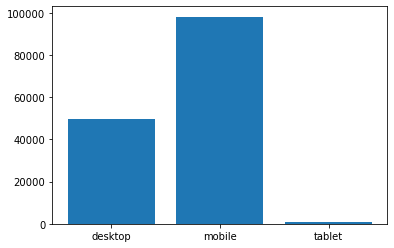

In [20]:
plot_barchart(data, 'sessions.deviceCategory')

In [21]:
def plot_double_barchart(df, col1, col2):
    unique1 = np.unique(df[col1])
    unique2 = np.unique(df[col2])
    sums1 = []
    sums2 = []
    for att1 in unique1:
        sums1.append(sum(df[col1] == att1))
    for att2 in unique2:
        sums2.append(sum(df[col2] == att2))
    plt.bar(unique1, sums1)
    plt.bar(unique2, sums2)

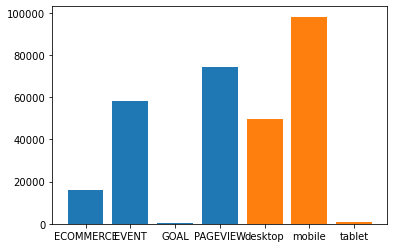

In [22]:
plot_double_barchart(copy, 'activityType', 'sessions.deviceCategory')

<ipython-input-23-4ceea0c068cc>:10: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


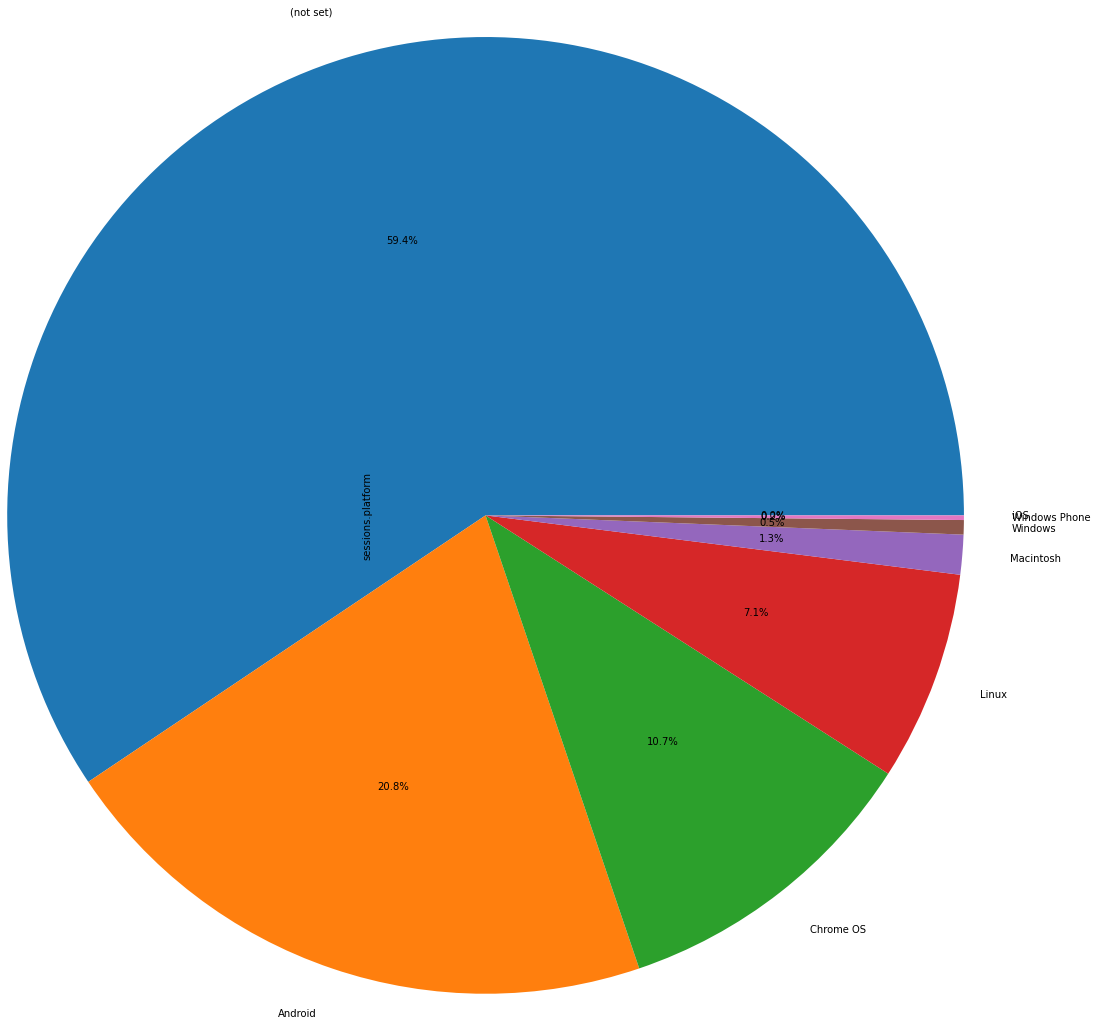

In [23]:
# One-Variable Plot 1:
print("\n")
from IPython.display import display, HTML
display(HTML('<b>Figure 1: Pie Chart for Platforms:</b>'))
print("\n")
copy['sessions.platform'].value_counts().plot.pie(labels=['(not set)', 'Android', 'Chrome OS', 'Linux', 'Macintosh','Windows', 'Windows Phone', 'iOS']
                                                         , autopct='%1.1f%%',radius=5.5)


plt.tight_layout()
plt.show();

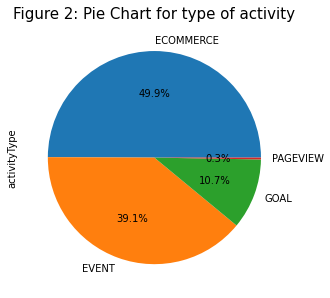

In [24]:
# One-Variable Plot 2:
print("\n")

print("\n")
copy['activityType'].value_counts().plot.pie(labels=['ECOMMERCE', 'EVENT', 'GOAL', 'PAGEVIEW']
                                                         , autopct='%1.1f%%')

plt.tight_layout()
plt.title('Figure 2: Pie Chart for type of activity', fontsize = 15)
plt.show();

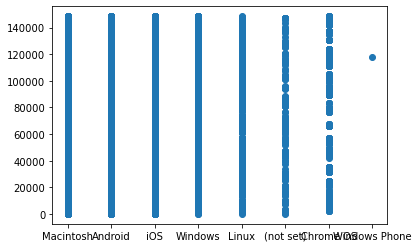

In [25]:
# One-Variable Plot 3:
print("\n")
from IPython.display import display, HTML
display(HTML('<b>Figure 3: Scatter plot for Platforms:</b>'))
print("\n")
plt.scatter(copy['sessions.platform'],copy.index)
plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
plt.show()

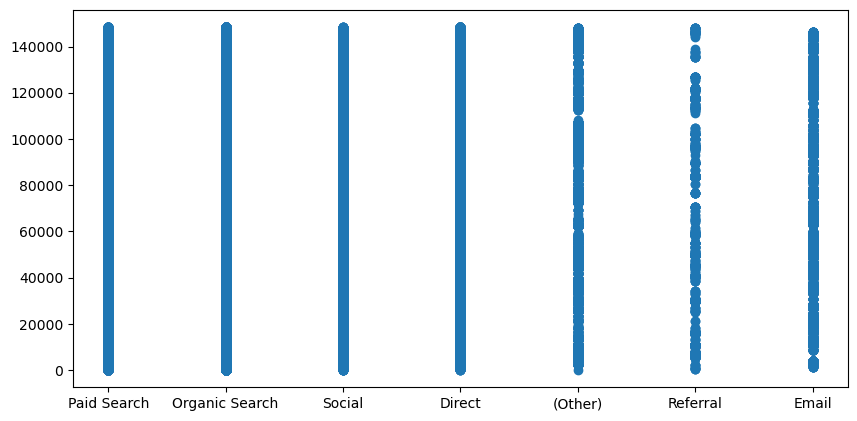

In [26]:
# One-Variable Plot 4:
print("\n")
from IPython.display import display, HTML
display(HTML('<b>Figure 4: Scatter plot for channels:</b>'))
print("\n")
plt.scatter(copy['channelGrouping'],copy.index)
plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
plt.show()

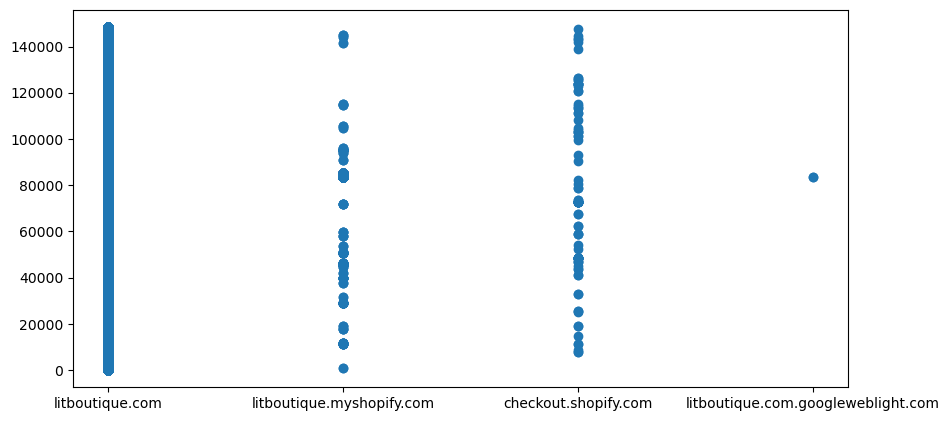

In [27]:
# One-Variable Plot 5:
print("\n")
from IPython.display import display, HTML
display(HTML('<b>Figure 5: Scatter plot for most surfed website:</b>'))
print("\n")
plt.scatter(copy['hostname'],copy.index)
plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
plt.show()

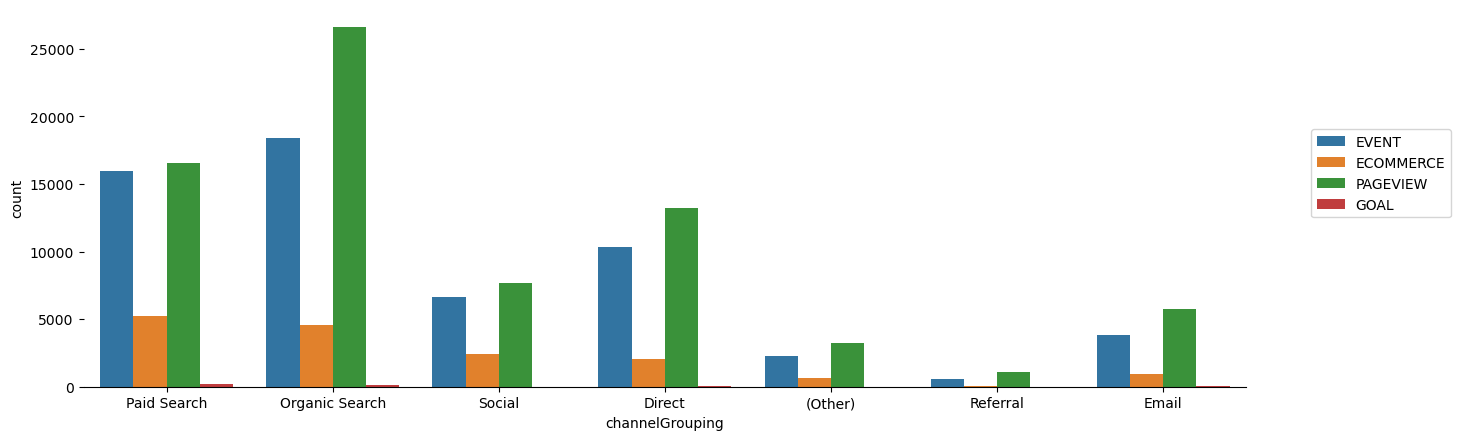

In [28]:
import seaborn as sns
plt.figure(figsize = (15,5))
g1 = sns.countplot(x='channelGrouping', hue='activityType', data=copy)
sns.despine(left=True)
plt.legend(bbox_to_anchor=(1.05, 0.5, 0.3, 0.2), loc='upper left')


/Users/zuaibshaikh/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20160 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/zuaibshaikh/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20040 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/zuaibshaikh/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21697 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/zuaibshaikh/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 29260 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/zuaibshaikh/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.

<Figure size 1200x1000 with 0 Axes>

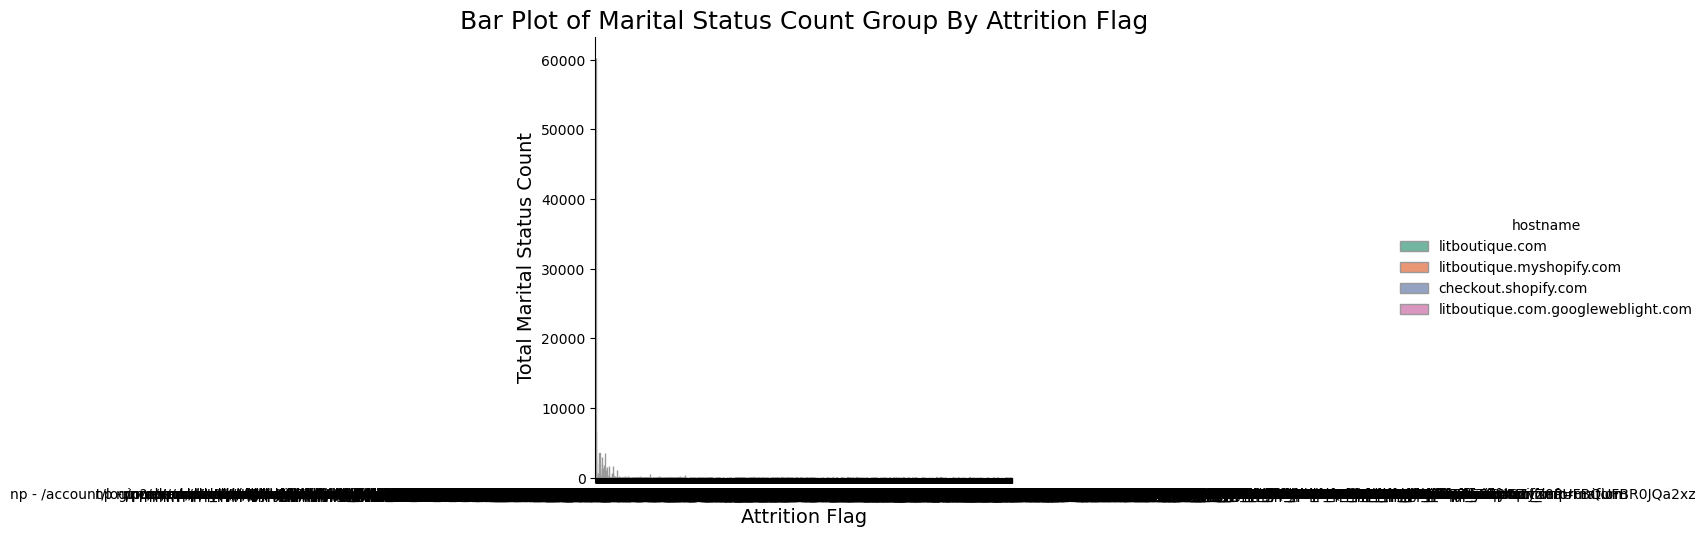

In [29]:
#2 variables Plot 2:
import seaborn as sns
plt.figure(figsize = (12, 10))
sns.catplot(x="keyword", hue="hostname", kind="count",
            palette="Set2", edgecolor=".6",
            data=copy)

plt.title("Bar Plot of Marital Status Count Group By Attrition Flag", size=18)
plt.xlabel("Attrition Flag",size=14)
plt.ylabel("Total Marital Status Count",size=14)
plt.show()

In [30]:
def plot_grouped_barchart(df, col, group_col):
    grouped_data = df.groupby(group_col)
    col_unique = np.unique(df[col])
    group_unique = np.unique(df[group_col])
    
    zeros = np.zeros(shape = (len(group_unique), len(col_unique)))
    sums = pd.DataFrame(data = zeros, columns = col_unique, index = group_unique)
    
    row_num = 0
    for val in group_unique:
        val_group = grouped_data.get_group(val)
        for col_val in col_unique:
            sum1 = len(val_group.loc[df[col] == col_val])
            sums[col_val][row_num] = sum1
        row_num = row_num + 1
    
    width = 1/len(col_unique) - (1/len(col_unique))**2
    
    x1 = np.arange(len(col_unique))
    x_list = [x1]
    for i in range(1,len(group_unique)):
        curr_x = [x+width for x in x_list[-1]]
        x_list.append(curr_x)
    
    print(sums)
    
    for j in range(0,len(group_unique)):
        plt.bar(x_list[j], sums.loc[group_unique[j]], width)

    x_means = []
    for k in range(0,len(col_unique)):
        x_sum = 0
        for l in range(0,len(x_list)):
            x = x_list[l]
            x_sum = x_sum + x[k]
        x_means.append(x_sum / len(group_unique))
    
    plt.xticks(x_means, col_unique)
    plt.legend(group_unique)
    plt.ylabel('Count')

           desktop   mobile  tablet
ECOMMERCE   4727.0  11106.0    69.0
EVENT      18775.0  39024.0   215.0
GOAL         124.0    292.0     1.0
PAGEVIEW   26088.0  47688.0   366.0


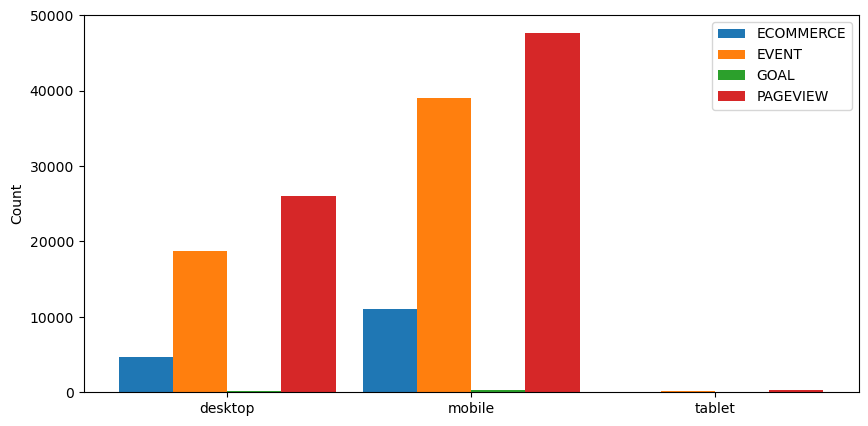

In [31]:
plot_grouped_barchart(copy, 'sessions.deviceCategory', 'activityType')

## 2. User-Level Visualisation

### Defining function for top searched products

In [32]:
def plot_barchart_topn(df, col, n):
    unique = np.unique(df[col])
    sums = []
    for att in unique:
        sums.append(sum(df[col] == att))
    top_n_idx = np.argsort(sums)[-n:]
    top_n_values = [sums[i] for i in top_n_idx]
    top_n_names = [unique[i] for i in top_n_idx]
    print(top_n_names)
    print(top_n_values)
    plt.bar(top_n_names, top_n_values)

['Tee Casuals', 'Swim', 'Tops Blouses', 'EnhancedEcommerce', 'Dress', 'All', 'Justuno']
[894, 980, 984, 1088, 3683, 6086, 35545]


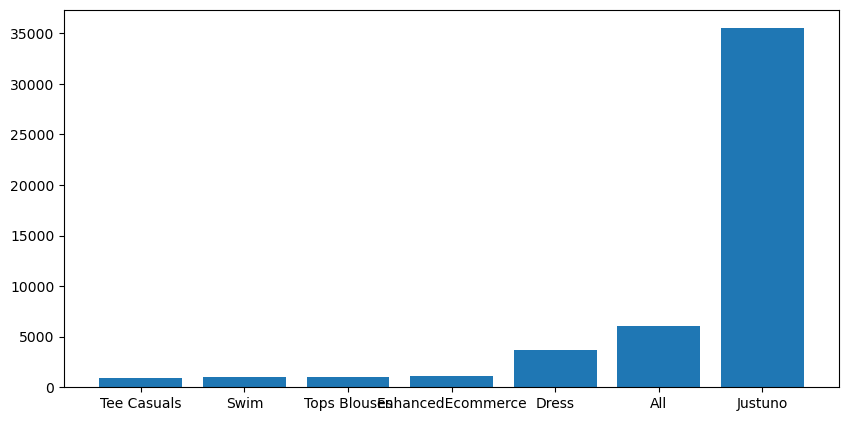

In [33]:
# top 7 searched products has been considered
plot_barchart_topn(event_rows, 'event.eventCategory', 7)


['Viewed Checkout - Contact information Page', 'Added Product', 'Viewed Orders - Thank You Page', 'Viewed Product', 'Targeted Overlay']
[1012, 1464, 3132, 13469, 34843]


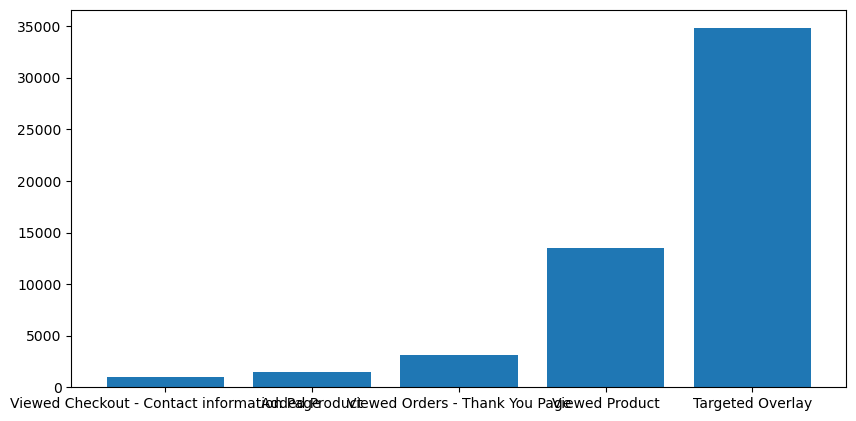

In [34]:
# top 5 searched event actions has been considered
plot_barchart_topn(event_rows, 'event.eventAction', 5)

### Defining function for least searched product 

In [35]:
def plot_barchart_bottom(df, col, n):
    unique = np.unique(df[col])
    sums = []
    for att in unique:
        sums.append(sum(df[col] == att))
    bot_n_idx = np.argsort(sums)[0:n]
    bot_n_values = [sums[i] for i in bot_n_idx]
    bot_n_names = [unique[i] for i in bot_n_idx]
    print(bot_n_names)
    print(bot_n_values)
    plt.bar(bot_n_names, bot_n_values)

['Sweatpants', 'Top', 'button', 'Tops', 'Searchanise', 'Bandana', 'Earrings', 'Gift Card', 'Belts', 'Ring']
[1, 3, 5, 6, 7, 8, 10, 12, 13, 21]


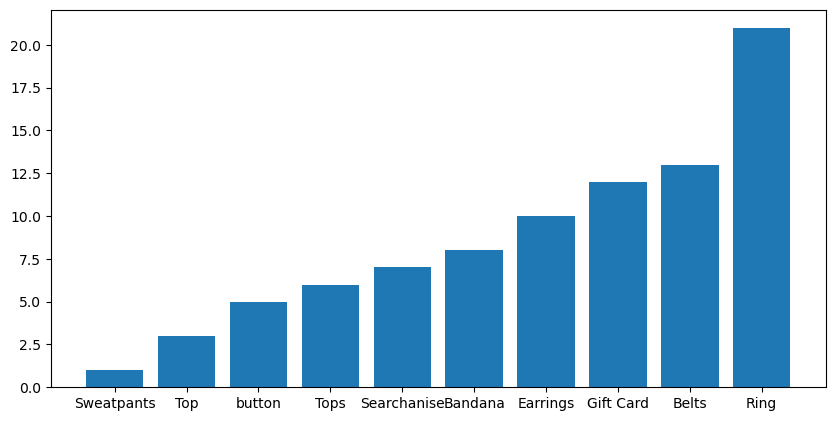

In [36]:
# bottom 10 searched products has been considered
plot_barchart_bottom(event_rows, 'event.eventCategory', 10)


['Viewed Checkout - Review Page', 'Engagement - Unlocked or CTA View', 'click', 'Added product', 'Tab Click']
[1, 1, 5, 7, 26]


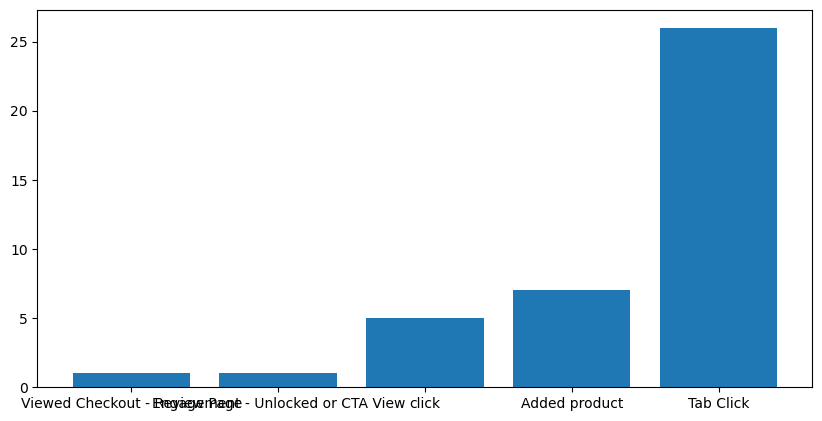

In [37]:
# bottom 5 searched event actions has been considered
plot_barchart_bottom(event_rows, 'event.eventAction', 5)

**Cleaning and improving the clarity of User Level graphics**

In [38]:
event_rows.head()

# Selecting meaning attribute for better insight
event_1=event_rows[["event.eventCategory","event.eventAction"]]
event_1

event.eventCategory               event.eventAction
0                  Justuno                Targeted Overlay
1                  Justuno                Targeted Overlay
3                      Bra                  Viewed Product
7                  Justuno                Targeted Overlay
10                 Justuno  Engagement - Incentivized Form
...                    ...                             ...
148464         Tee Casuals                  Viewed Product
148468                 Bra                   Added Product
148469             Justuno                Targeted Overlay
148470             Justuno                Targeted Overlay
148472                 Bra                  Viewed Product

[58014 rows x 2 columns]

- This session will make easy to understand about users intrests  i.e (which all users viewed and purchased the products, viewed and not purchased the products, add the product to cart and, user just visit the website) 

- Here we making new columns with each variable having 10 different attributes out off 35 for better insight on it.

In [39]:

all_products_1 = event_1.loc[(event_1['event.eventCategory'].isin(['Dress', 'Swim', 'Tops Blouses', 'Jacket', 'Tee Casuals', 'Tops Blouse' ,  'Sweater' , 'Skirt' ,'EnhancedEcommerce','oribi_export'])) & 
                    (event_1['event.eventAction'].isin(['Viewed Product','Added Product','Completed Order','visit']))] 

all_products_2=  event_1.loc[(event_1['event.eventCategory'].isin(['Bra' , 'Hat'   , 'Shoes',  'Bottoms'  ,'Accessories','Denim','Sunglasses', 'Pants' ,'Shorts', 'Leggings' ])) & 
                    (event_1['event.eventAction'].isin(['Viewed Product','Added Product','Completed Order','visit']))] 

all_products_3 = event_1.loc[(event_1['event.eventCategory'].isin(['Bag', 'Gift' , 'Outerwear', 'Necklace' ,'Private Collection ', 'Tops' ,'Scarf', 'Earring' ,'Jewelry'  ,'Ring' ])) & 
                    (event_1['event.eventAction'].isin(['Viewed Product','Added Product','Completed Order','visit']))] 

all_products_4=  event_1.loc[(event_1['event.eventCategory'].isin(['Belts', 'Earrings' ,'Gift Card' ,  'Bandana'  ,'Bracelet',  'Top'])) & 
                    (event_1['event.eventAction'].isin(['Viewed Product','Added Product','Completed Order','visit']))] 



**Random 10 products vs User Interests**

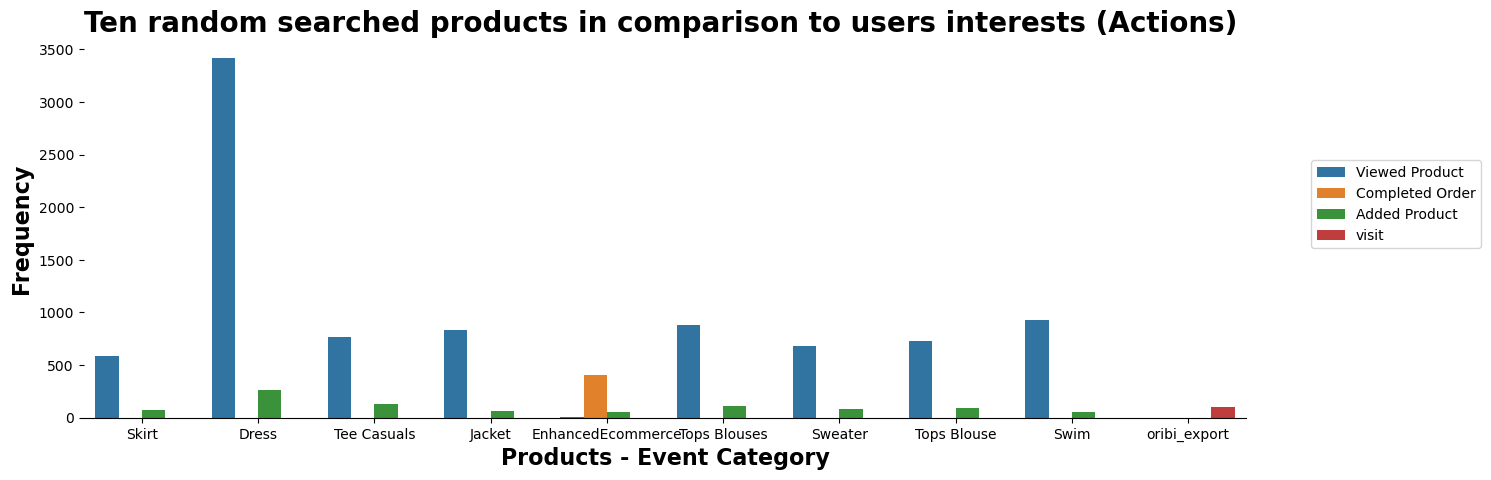

In [40]:
import seaborn as sns
plt.figure(figsize = (15,5))
x_7 = sns.countplot(x= all_products_1['event.eventCategory'], hue=all_products_1['event.eventAction'])
plt.title('Ten random searched products in comparison to users interests (Actions) ', fontsize=20, fontweight='bold')
plt.xlabel('Products - Event Category', fontsize=16, fontweight='bold')
plt.ylabel('Frequency', fontsize=16, fontweight='bold')
sns.despine(left=True)
plt.legend(bbox_to_anchor=(1.05, 0.5, 0.3, 0.2), loc='upper left')

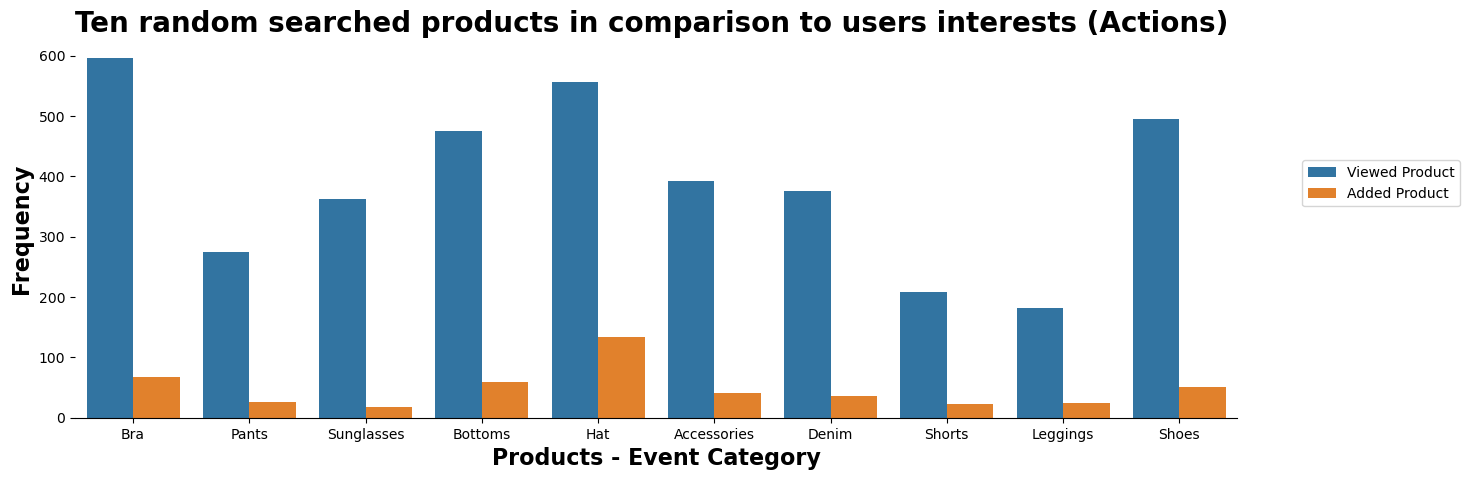

In [41]:
import seaborn as sns
plt.figure(figsize = (15,5))
x_8 = sns.countplot(x= all_products_2['event.eventCategory'], hue=all_products_2['event.eventAction'])
plt.title('Ten random searched products in comparison to users interests (Actions) ', fontsize=20, fontweight='bold')
plt.xlabel('Products - Event Category', fontsize=16, fontweight='bold')
plt.ylabel('Frequency', fontsize=16, fontweight='bold')
sns.despine(left=True)
plt.legend(bbox_to_anchor=(1.05, 0.5, 0.3, 0.2), loc='upper left')

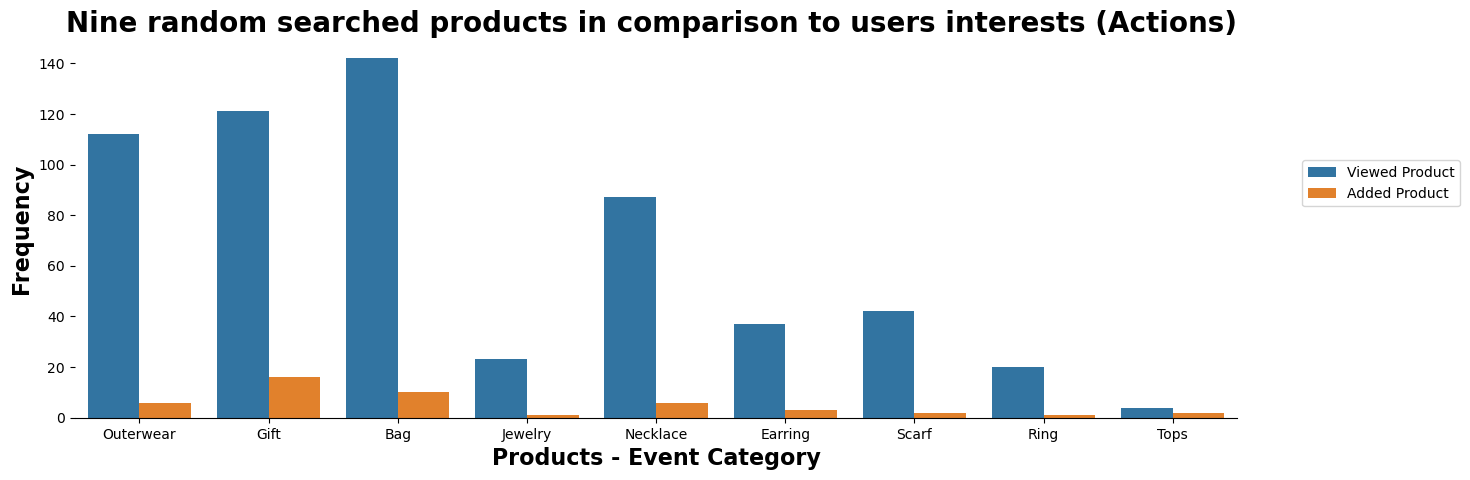

In [42]:
import seaborn as sns
plt.figure(figsize = (15,5))
x_9 = sns.countplot(x= all_products_3['event.eventCategory'], hue=all_products_3['event.eventAction'])
plt.title('Nine random searched products in comparison to users interests (Actions) ', fontsize=20, fontweight='bold')
plt.xlabel('Products - Event Category', fontsize=16, fontweight='bold')
plt.ylabel('Frequency', fontsize=16, fontweight='bold')
sns.despine(left=True)
plt.legend(bbox_to_anchor=(1.05, 0.5, 0.3, 0.2), loc='upper left')


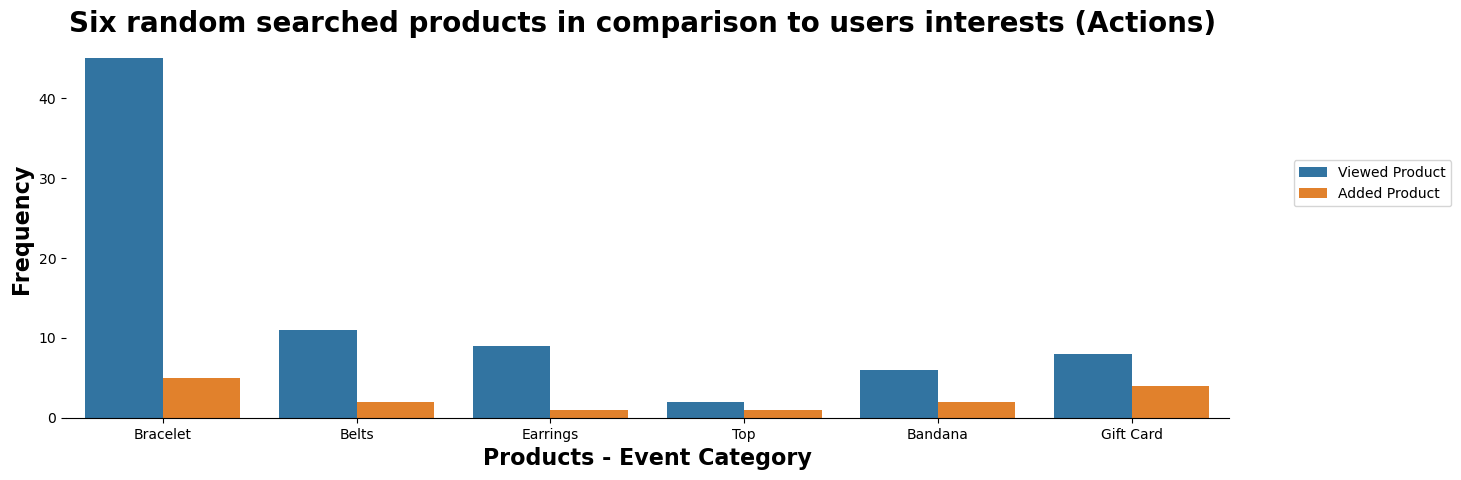

In [43]:
import seaborn as sns
plt.figure(figsize = (15,5))
x_10 = sns.countplot(x= all_products_4['event.eventCategory'], hue=all_products_4['event.eventAction'])
plt.title('Six random searched products in comparison to users interests (Actions) ', fontsize=20, fontweight='bold')
plt.xlabel('Products - Event Category', fontsize=16, fontweight='bold')
plt.ylabel('Frequency', fontsize=16, fontweight='bold')
sns.despine(left=True)
plt.legend(bbox_to_anchor=(1.05, 0.5, 0.3, 0.2), loc='upper left')


- Creating NEW Variables for 6 most search products, 10 least searched products with respect to 5 most searched action,5 least searched action

Information on New columns
- selecting top 6 products and top 5 action in one variable for better insight
- selecting Bottom 10 products and bottom 5 action in one variable for better insight
- selecting bottom 10 poducts 
- selecting random event actions

In [44]:
#
www = event_1.loc[(event_1['event.eventCategory'].isin(['Tee Casuals', 'Swim', 'Tops Blouses', 'EnhancedEcommerce', 'Dress', 'All'])) & 
                 (event_1['event.eventAction'].isin(['Viewed Checkout - Contact information Page', 'Added Product', 'Viewed Orders - Thank You Page', 'Viewed Product', 'Targeted Overlay']))]

# 
www_32 = event_1.loc[(event_1['event.eventCategory'].isin(['Sweatpants', 'Top', 'button', 'Tops', 'Searchanise', 'Bandana', 'Earrings', 'Gift Card', 'Belts', 'Ring'])) & 
                    (event_1['event.eventAction'].isin(['Viewed Checkout - Review Page', 'Engagement - Unlocked or CTA View', 'click', 'Added product', 'Tab Click']))] 
        
# 
www_323 = event_1.loc[event_1['event.eventCategory'].isin(['Sweatpants', 'Top', 'button', 'Tops', 'Searchanise', 'Bandana', 'Earrings', 'Gift Card', 'Belts', 'Ring'])]  

#
www_322 = event_1.loc[event_1['event.eventAction'].isin(['Viewed Checkout - Review Page', 'Engagement - Unlocked or CTA View', 'click', 'Tab Click','Viewed Product', 'Added Product'])]  


**10 least search products with respect to random actions**


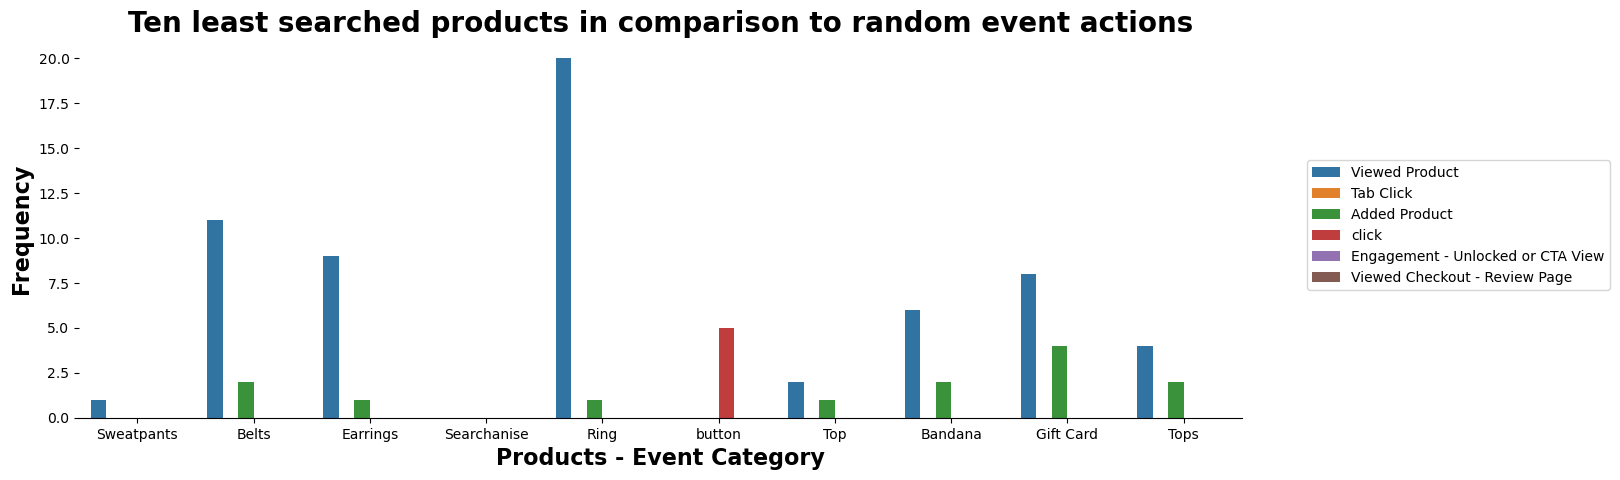

In [45]:
import seaborn as sns
plt.figure(figsize = (15,5))
x_1 = sns.countplot(x= www_323['event.eventCategory'], hue=www_322['event.eventAction'])
plt.title('Ten least searched products in comparison to random event actions', fontsize=20, fontweight='bold')
plt.xlabel('Products - Event Category', fontsize=16, fontweight='bold')
plt.ylabel('Frequency', fontsize=16, fontweight='bold')
sns.despine(left=True)
plt.legend(bbox_to_anchor=(1.05, 0.5, 0.3, 0.2), loc='upper left')

**10 least search products with respect to online host**

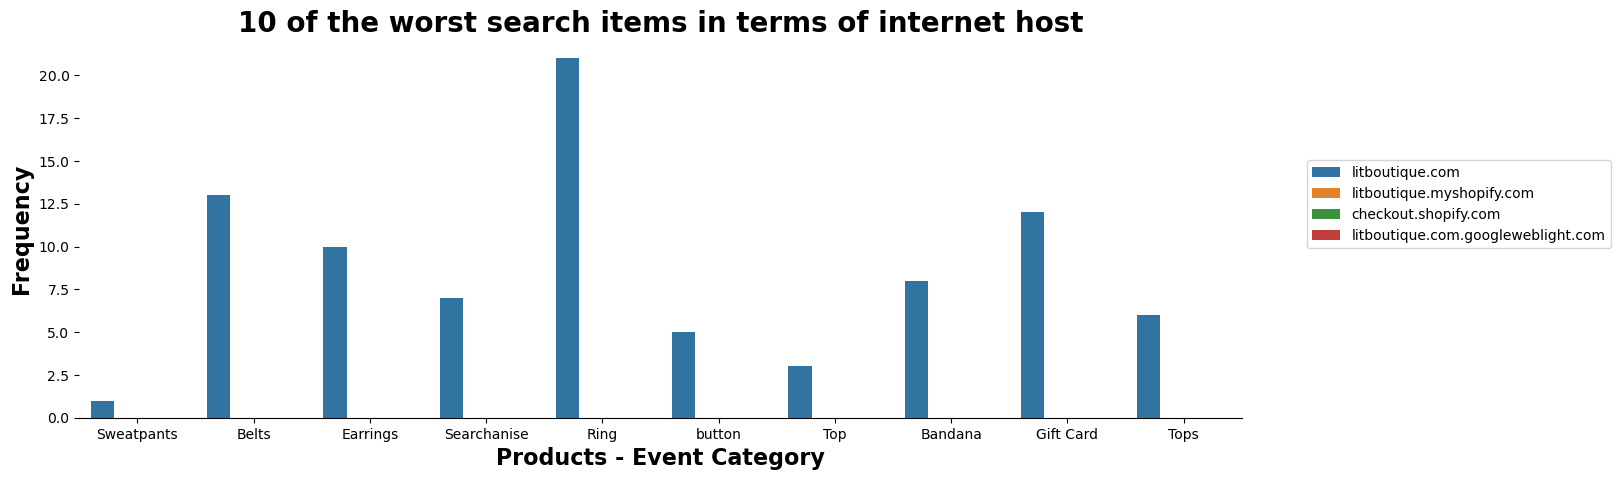

In [46]:
import seaborn as sns
plt.figure(figsize = (15,5))
x_2 = sns.countplot(x= www_323['event.eventCategory'], hue= copy['hostname'] )
plt.title('10 of the worst search items in terms of internet host', fontsize=20, fontweight='bold')
plt.xlabel('Products - Event Category', fontsize=16, fontweight='bold')
plt.ylabel('Frequency', fontsize=16, fontweight='bold')
sns.despine(left=True)
plt.legend(bbox_to_anchor=(1.05, 0.5, 0.3, 0.2), loc='upper left')

**6 most searched products vs top 5 event actions**

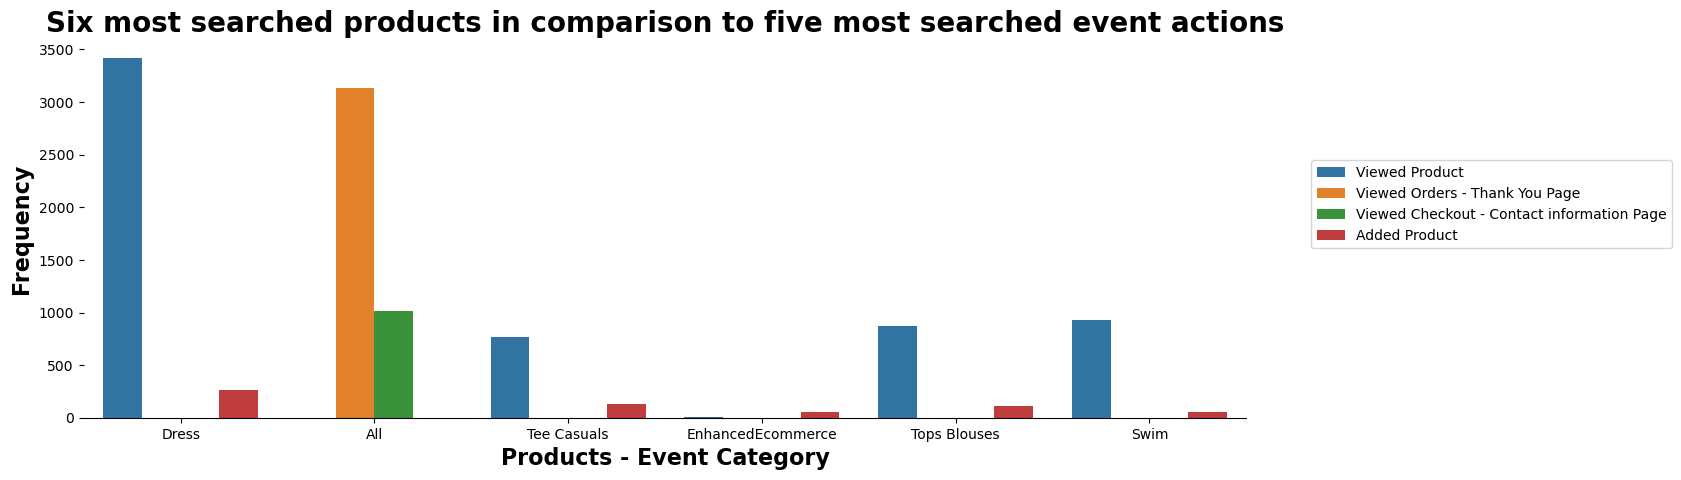

In [47]:
import seaborn as sns
plt.figure(figsize = (15,5))
x_3 = sns.countplot(x= 'event.eventCategory', hue='event.eventAction', data=www)
plt.title('Six most searched products in comparison to five most searched event actions', fontsize=20, fontweight='bold')
plt.xlabel('Products - Event Category', fontsize=16, fontweight='bold')
plt.ylabel('Frequency', fontsize=16, fontweight='bold')
sns.despine(left=True)
plt.legend(bbox_to_anchor=(1.05, 0.5, 0.3, 0.2), loc='upper left')


**6 most searched products with respect to online host**

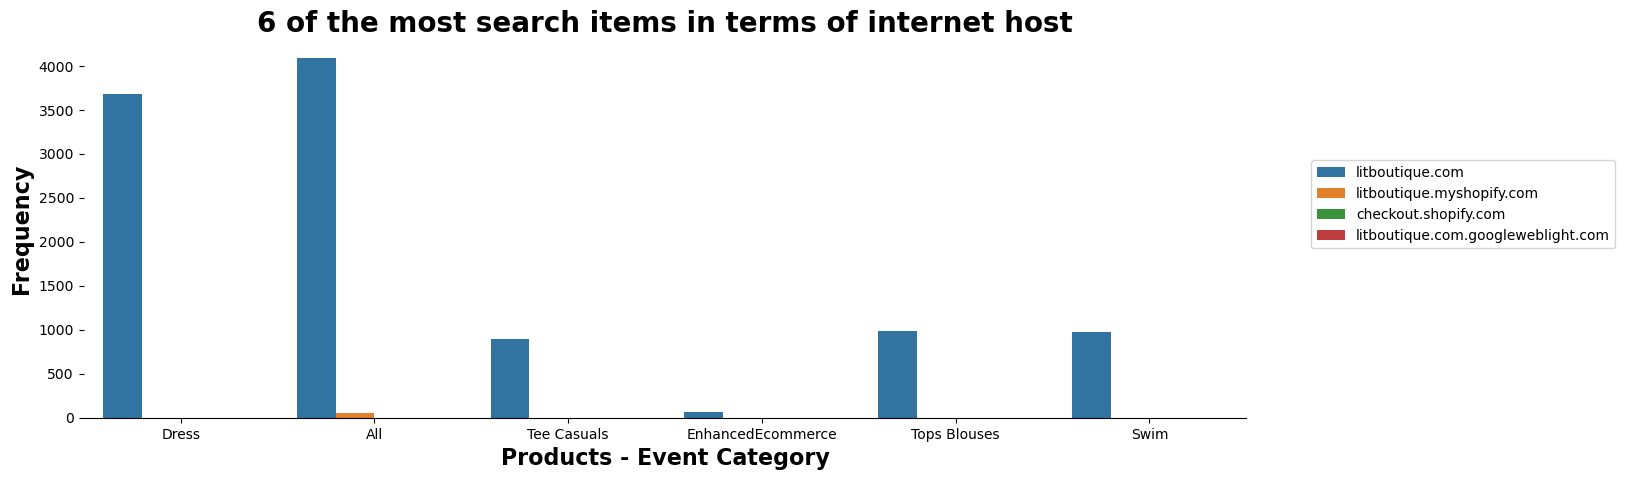

In [48]:
import seaborn as sns
plt.figure(figsize = (15,5))
x_4 = sns.countplot(x= www['event.eventCategory'], hue= copy['hostname'] )
plt.title('6 of the most search items in terms of internet host', fontsize=20, fontweight='bold')
plt.xlabel('Products - Event Category', fontsize=16, fontweight='bold')
plt.ylabel('Frequency', fontsize=16, fontweight='bold')
sns.despine(left=True)
plt.legend(bbox_to_anchor=(1.05, 0.5, 0.3, 0.2), loc='upper left')

**10 least search products vs 5 least search event actions**

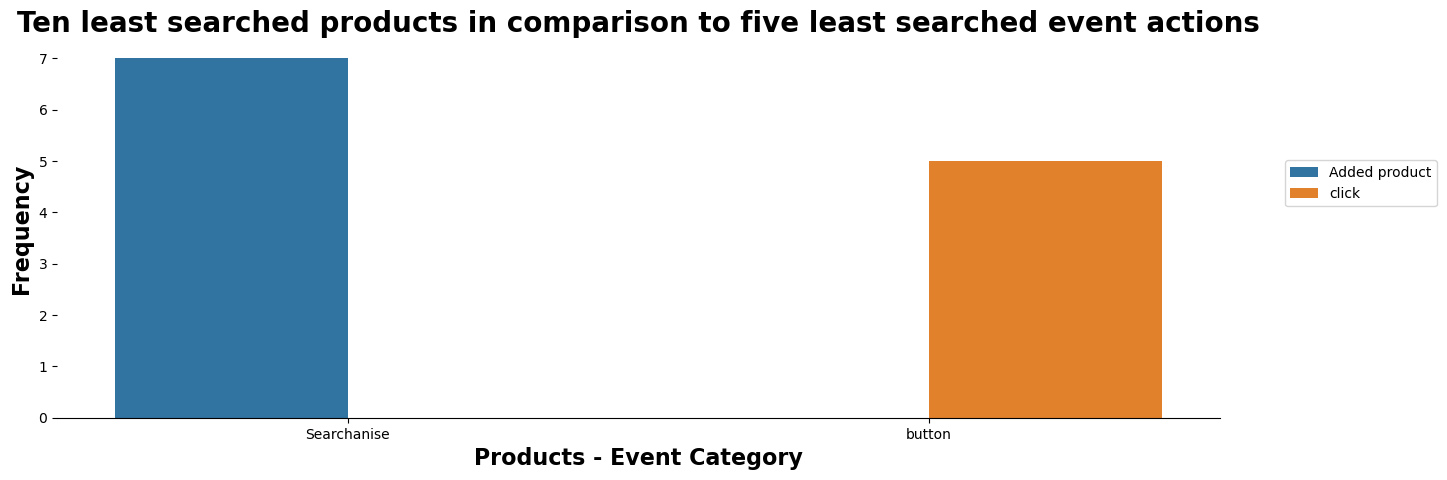

In [49]:
import seaborn as sns
plt.figure(figsize = (15,5))
x_5 = sns.countplot(x= 'event.eventCategory', hue='event.eventAction', data=www_32)
plt.title('Ten least searched products in comparison to five least searched event actions', fontsize=20, fontweight='bold')
plt.xlabel('Products - Event Category', fontsize=16, fontweight='bold')
plt.ylabel('Frequency', fontsize=16, fontweight='bold')
sns.despine(left=True)
plt.legend(bbox_to_anchor=(1.05, 0.5, 0.3, 0.2), loc='upper left')

**10 least search products with respect to online host**

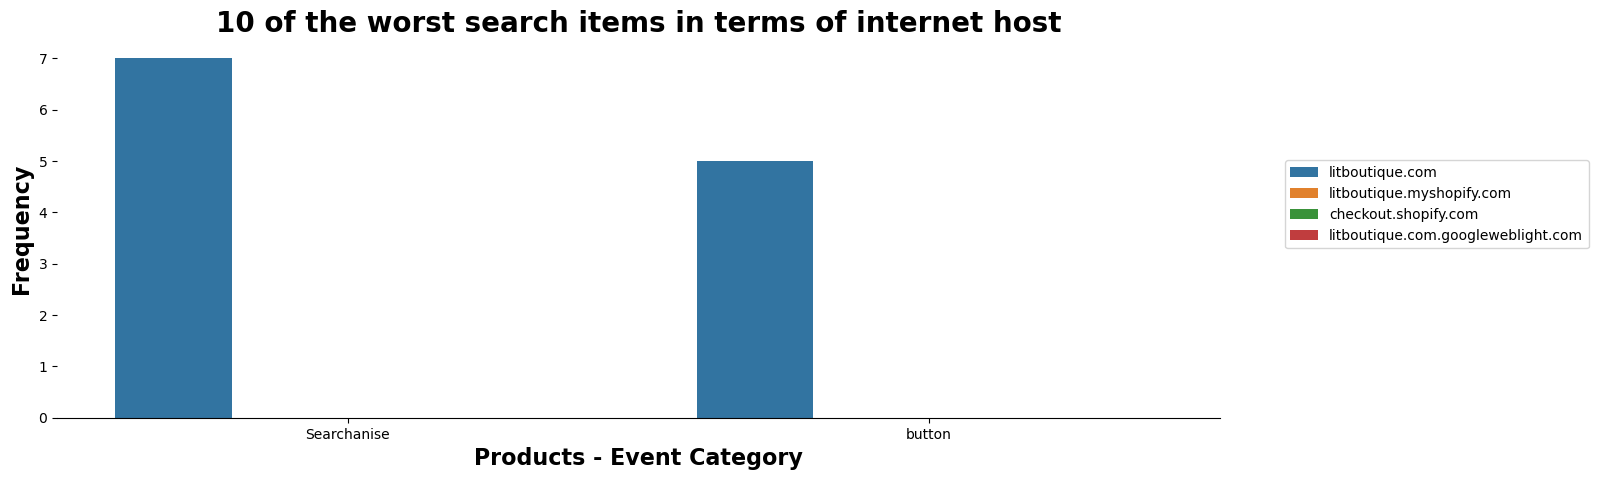

In [50]:
import seaborn as sns
plt.figure(figsize = (15,5))
x_6 = sns.countplot(x= www_32['event.eventCategory'], hue= copy['hostname'] )
plt.title('10 of the worst search items in terms of internet host', fontsize=20, fontweight='bold')
plt.xlabel('Products - Event Category', fontsize=16, fontweight='bold')
plt.ylabel('Frequency', fontsize=16, fontweight='bold')
sns.despine(left=True)
plt.legend(bbox_to_anchor=(1.05, 0.5, 0.3, 0.2), loc='upper left')

# Defining function

In [51]:
def plot_barchart_threshold(df, col, t):
    unique = np.unique(df[col])
    end_unique = []
    sums = []
    for att in unique:
        sums.append(sum(df[col] == att))
        if sums[-1] < t:
            sums.pop()
        else:
            end_unique.append(att)
    print(end_unique)
    print(sums)
    plt.bar(end_unique, sums)

['(not set)', 'np - /', 'product_type_l1==dress', 'product_type_l1==hat', 'product_type_l1==tee casuals', 'product_type_l1==tops blouse']
[61173, 4630, 6722, 3537, 3488, 3026]


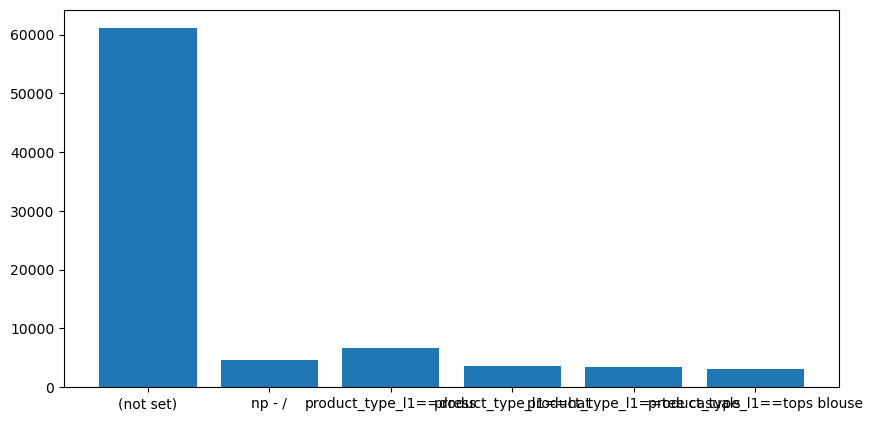

In [52]:
plot_barchart_threshold(copy, 'keyword', 3000)

In [53]:
def plot_barchart_threshold_reverse(df, col, t):
    unique = np.unique(df[col])
    end_unique = []
    sums = []
    for att in unique:
        sums.append(sum(df[col] == att))
        if sums[-1] > t:
            sums.pop()
        else:
            end_unique.append(att)
    print(end_unique)
    print(sums)
    plt.bar(end_unique, sums)

['CP - US | Shopping | Dresses | tROAS', 'horoscopes', 'pre_black_friday_434304', 'sunday-poll', 'wear-lit']
[1, 5, 3, 4, 2]


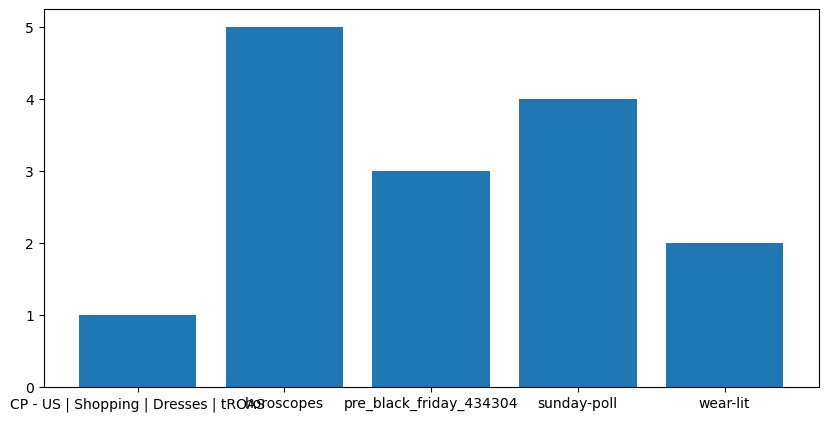

In [54]:
plot_barchart_threshold_reverse(copy, 'campaign', 5)

In [55]:
def plot_barchart_threshold_interval(df, col, t1, t2):
    unique = np.unique(df[col])
    end_unique = []
    sums = []
    for att in unique:
        sums.append(sum(df[col] == att))
        if sums[-1] < t1 or sums[-1] > t2:
            sums.pop()
        else:
            end_unique.append(att)
    print(end_unique)
    print(sums)
    plt.bar(end_unique, sums)

['baidu', 'ecosia.org', 'facebook.com', 'in.pinterest.com', 'l.instagram.com', 'pinterest.de', 'shop_app', 'viola-kazoo-5zjk.squarespace.com', 'yahoo']
[139, 157, 106, 112, 171, 125, 151, 188, 173]


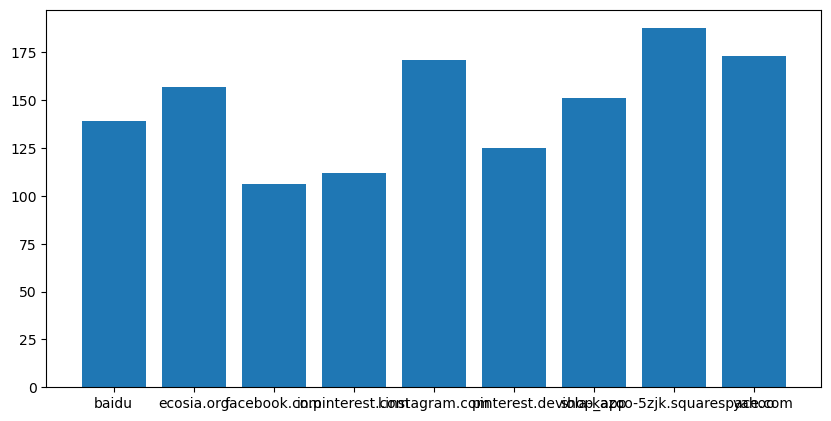

In [56]:
plot_barchart_threshold_interval(copy, 'source', 100, 200)

In [57]:
def plot_grouped_barchart_prop(df, col, group_col):
    #TODO: actually make this proportions
    grouped_data = df.groupby(group_col)
    col_unique = np.unique(df[col])
    group_unique = np.unique(df[group_col])
    
    zeros = np.zeros(shape = (len(group_unique), len(col_unique)))
    sums = pd.DataFrame(data = zeros, columns = col_unique, index = group_unique)
    
    row_num = 0
    for val in group_unique:
        val_group = grouped_data.get_group(val)
        for col_val in col_unique:
            sum1 = len(val_group.loc[df[col] == col_val])
            sums[col_val][row_num] = sum1
        row_num = row_num + 1
    
    width = 1/len(col_unique) - (1/len(col_unique))**2
    
    x1 = np.arange(len(col_unique))
    x_list = [x1]
    for i in range(1,len(group_unique)):
        curr_x = [x+width for x in x_list[-1]]
        x_list.append(curr_x)
    
    print(sums)
    
    for j in range(0,len(group_unique)):
        plt.bar(x_list[j], sums.loc[group_unique[j]], width)

    x_means = []
    for k in range(0,len(col_unique)):
        x_sum = 0
        for l in range(0,len(x_list)):
            x = x_list[l]
            x_sum = x_sum + x[k]
        x_means.append(x_sum / len(group_unique))
    
    plt.xticks(x_means, col_unique)
    plt.legend(group_unique)
    plt.ylabel('Count')

In [58]:
from apyori import apriori
records = []
for i in range(0,len(copy)):
    records.append([str(copy.values[i,j]) for j in range(0,13)])

KeyboardInterrupt: 

In [59]:
from apyori import apriori
rules = list(apriori(records, min_support = 0.2, min_confidence = 0.75, min_lift = 1, min_length = 2))

In [60]:
for item in rules:

    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    if(len(items) > 1 and "(not set)" not in items[0] and "(not set)" not in items[1]):
        print("Rule: " + items[0] + " -> " + items[1])

        #second index of the inner list
        print("Support: " + str(item[1]))

        #third index of the list located at 0th
        #of the third index of the inner list

        print("Confidence: " + str(item[2][0][2]))
        print("Lift: " + str(item[2][0][3]))
        print("=====================================")

Rule: 2021-01-26 00:00:00 -> /products/structured-flex-rib-tank-bra-black?variant=31994355449926&dfw_tracker=24076-31994355449926
Support: 1.0
Confidence: 1.0
Lift: 1.0
Rule: 2021-01-26 17:47:32.529986+00:00 -> /products/structured-flex-rib-tank-bra-black?variant=31994355449926&dfw_tracker=24076-31994355449926
Support: 0.5
Confidence: 1.0
Lift: 1.0
Rule: /products/structured-flex-rib-tank-bra-black?variant=31994355449926&dfw_tracker=24076-31994355449926 -> 2021-01-26 17:47:38.685400+00:00
Support: 0.5
Confidence: 1.0
Lift: 1.0
Rule: /products/structured-flex-rib-tank-bra-black?variant=31994355449926&dfw_tracker=24076-31994355449926 -> CP - Smart Shopping - All
Support: 1.0
Confidence: 1.0
Lift: 1.0
Rule: /products/structured-flex-rib-tank-bra-black?variant=31994355449926&dfw_tracker=24076-31994355449926 -> EVENT
Support: 1.0
Confidence: 1.0
Lift: 1.0
Rule: /products/structured-flex-rib-tank-bra-black?variant=31994355449926&dfw_tracker=24076-31994355449926 -> Macintosh
Support: 1.0
Conf

In [61]:
#Categorise
copy['activityType'] = copy['activityType'].astype('category')
copy['campaign'] = copy['campaign'].astype('category')
copy['channelGrouping'] = copy['channelGrouping'].astype('category')
copy['hostname'] = copy['hostname'].astype('category')
copy['keyword'] = copy['keyword'].astype('category')
copy['landingPagePath'] = copy['landingPagePath'].astype('category')
copy['medium'] = copy['medium'].astype('category')
copy['sessions.dataSource'] = copy['sessions.dataSource'].astype('category')
copy['sessions.deviceCategory'] = copy['sessions.deviceCategory'].astype('category')
copy['sessions.platform'] = copy['sessions.platform'].astype('category')
copy['source'] = copy['source'].astype('category')

In [62]:
copy.dtypes

activityTime               datetime64[ns, UTC]
source                                category
medium                                category
channelGrouping                       category
campaign                              category
keyword                               category
hostname                              category
landingPagePath                       category
activityType                          category
sessions.sessionDate            datetime64[ns]
sessions.deviceCategory               category
sessions.platform                     category
sessions.dataSource                   category
userId                                   int64
dtype: object

In [63]:
#Use activityTime to get weekday and hour
days = []
for i in range(0,len(copy)):
    days.append(copy['activityTime'][i].weekday())
hours = []
for j in range(0,len(copy)):
    hours.append(copy['activityTime'][j].hour)

In [71]:
copy_1 = copy.copy()

copy_1['days']= days
copy_1['hours'] = hours
copy_1.head()

activityTime  source medium channelGrouping  \
0 2021-01-26 17:47:38.685400+00:00  google    cpc     Paid Search   
1 2021-01-26 17:47:32.529986+00:00  google    cpc     Paid Search   
2 2021-01-26 17:47:29.941225+00:00  google    cpc     Paid Search   
3 2021-01-26 17:47:29.941225+00:00  google    cpc     Paid Search   
4 2021-01-26 17:47:29.856545+00:00  google    cpc     Paid Search   

                    campaign               keyword         hostname  \
0  CP - Smart Shopping - All  product_type_l1==bra  litboutique.com   
1  CP - Smart Shopping - All  product_type_l1==bra  litboutique.com   
2  CP - Smart Shopping - All  product_type_l1==bra  litboutique.com   
3  CP - Smart Shopping - All  product_type_l1==bra  litboutique.com   
4  CP - Smart Shopping - All  product_type_l1==bra  litboutique.com   

                                     landingPagePath activityType  \
0  /products/structured-flex-rib-tank-bra-black?v...        EVENT   
1  /products/structured-flex-rib-tank-bra-black?v...        EVENT   
2  /products/structured-flex-rib-tank-bra-black?v...    ECOMMERCE   
3  /products/structured-flex-rib-tank-bra-black?v...        EVENT   
4  /products/structured-flex-rib-tank-bra-black?v...     PAGEVIEW   

  sessions.sessionDate sessions.deviceCategory sessions.platform  \
0           2021-01-26                 desktop         Macintosh   
1           2021-01-26                 desktop         Macintosh   
2           2021-01-26                 desktop         Macintosh   
3           2021-01-26                 desktop         Macintosh   
4           2021-01-26                 desktop         Macintosh   

  sessions.dataSource  userId  days  hours  
0                 web       0     1     17  
1                 web       0     1     17  
2                 web       0     1     17  
3                 web       0     1     17  
4                 web       0     1     17

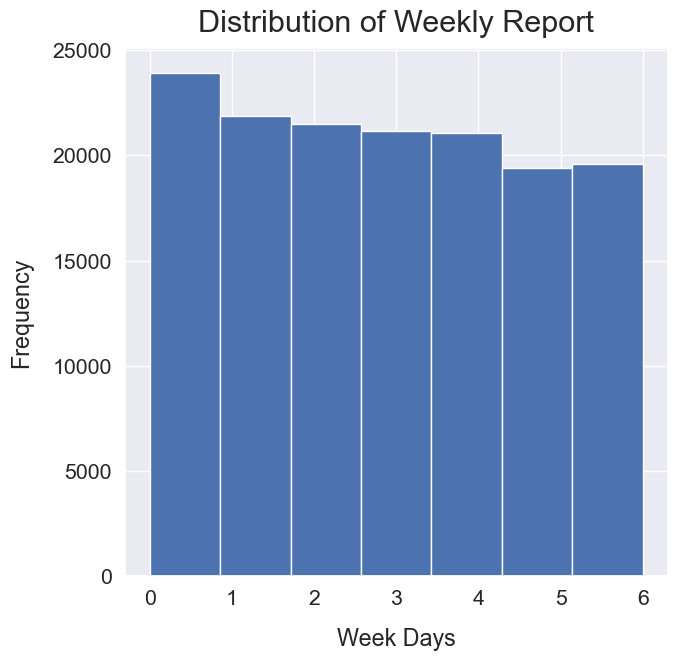

In [72]:
sns.set(font_scale=1.4)
copy_1['days'].plot(kind='hist', bins=7, figsize=(7, 7));
plt.xlabel("Week Days", labelpad=14)
plt.ylabel("Frequency", labelpad=14)
plt.title("Distribution of Weekly Report", y=1.015, fontsize=22);

In [ ]:
#plt.hist(days, bins=7)

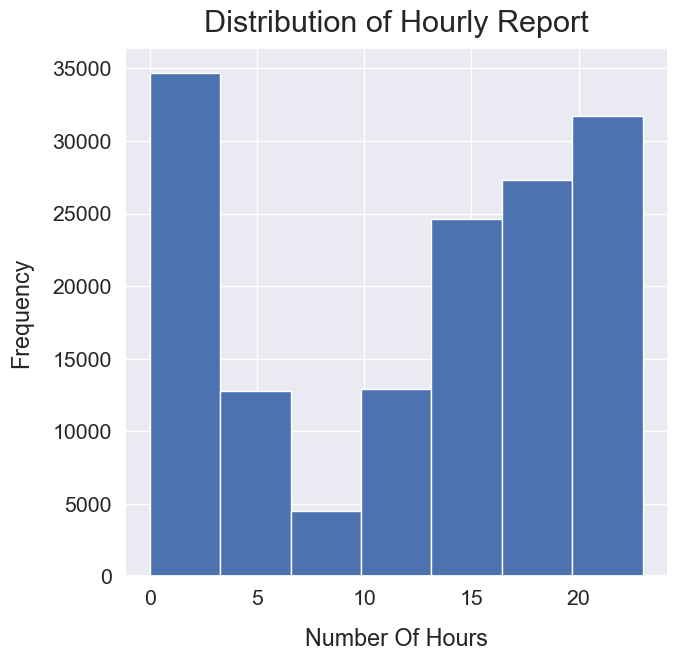

In [73]:
sns.set(font_scale=1.4)
copy_1['hours'].plot(kind='hist', bins=7, figsize=(7, 7));
plt.xlabel("Number Of Hours", labelpad=14)
plt.ylabel("Frequency", labelpad=14)
plt.title("Distribution of Hourly Report", y=1.015, fontsize=22);

In [ ]:
#plt.hist(hours, bins=24)

**Heat Map**

In [74]:
day_hour = pd.DataFrame(list(zip(days, hours)), columns = ['Day', 'Hour'])

day_hour['Day'].replace(0, 'Sunday', inplace=True)
day_hour['Day'].replace(1, 'Monday', inplace=True)
day_hour['Day'].replace(2, 'Tuesday', inplace=True)
day_hour['Day'].replace(3, 'Wednesday', inplace=True)
day_hour['Day'].replace(4, 'Thursday', inplace=True)
day_hour['Day'].replace(5, 'Friday', inplace=True)
day_hour['Day'].replace(6, 'Saturday', inplace=True)

In [75]:
def plot_heatmap(df, col, group_col, figsize=(15,10)):
    grouped_data = df.groupby(group_col)
    col_unique = np.unique(df[col])
    group_unique = np.unique(df[group_col])
    
    zeros = np.zeros(shape = (len(group_unique), len(col_unique)))
    sums = pd.DataFrame(data = zeros, columns = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'],
                        index = group_unique)
    
    row_num = 0
    for val in group_unique:
        val_group = grouped_data.get_group(val)
        for col_val in col_unique:
            sum1 = len(val_group.loc[df[col] == col_val])
            sums[col_val][row_num] = sum1
        row_num = row_num + 1
    
    width = 1/len(col_unique) - (1/len(col_unique))**2
    
    x1 = np.arange(len(col_unique))
    x_list = [x1]
    for i in range(1,len(group_unique)):
        curr_x = [x+width for x in x_list[-1]]
        x_list.append(curr_x)
    
    #print(sums)
    sns.set(rc={'figure.figsize':figsize})
    sns.heatmap(sums, annot=True, fmt='g', cmap='viridis')

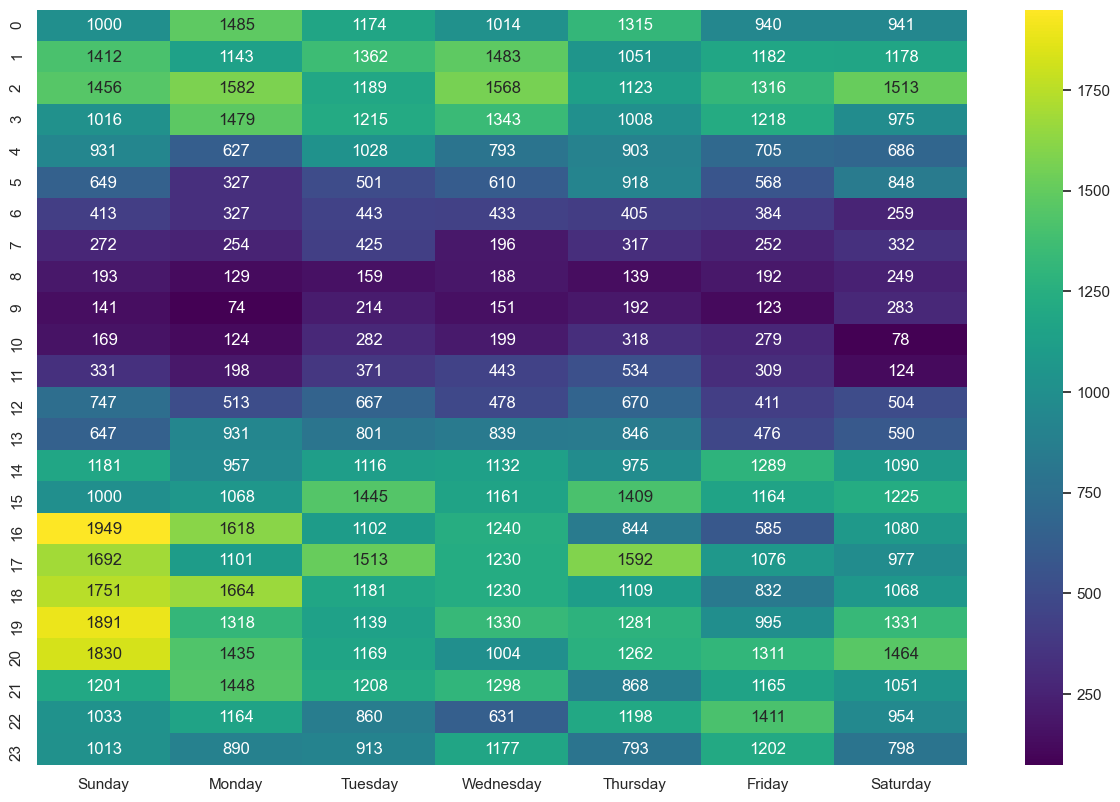

In [76]:

from IPython.display import display, HTML
display(HTML('<b> <h2><center> Heatmap by Day of Week and Hour of Day</h2> </center> </b>'))
plot_heatmap(day_hour, 'Day', 'Hour')


In [77]:
#For each date and hour get the 
def get_visits_table(df, cols):
    new_cols = cols.copy()
    new_cols.append('visits')
    visits_table = pd.DataFrame(columns = new_cols)
    categories = []
    for col in cols:
        categories.append(np.unique(df[col]))
    combos = list(itertools.product(*categories))
    
    for combo in combos:
        new_df = df.loc[df[cols[0]] == combo[0]]
        for i in range(1, len(combo)):
            new_df = new_df.loc[new_df[cols[i]] == combo[i]]
        visits = len(new_df)
        combo = combo + (visits,)
        combo = [combo]
        row = pd.DataFrame(combo, columns = new_cols)
        visits_table = visits_table.append(row)
    
    return visits_table

In [78]:
copy['hour'] = hours

In [79]:
visits = get_visits_table(copy, ['sessions.sessionDate', 'hour', 'sessions.platform'])
visits.tail(20)

sessions.sessionDate hour sessions.platform visits
0           2021-05-01   21         Macintosh      2
0           2021-05-01   21           Windows      8
0           2021-05-01   21     Windows Phone      0
0           2021-05-01   21               iOS     28
0           2021-05-01   22         (not set)      0
0           2021-05-01   22           Android      4
0           2021-05-01   22         Chrome OS      0
0           2021-05-01   22             Linux      0
0           2021-05-01   22         Macintosh      0
0           2021-05-01   22           Windows      5
0           2021-05-01   22     Windows Phone      0
0           2021-05-01   22               iOS     20
0           2021-05-01   23         (not set)      0
0           2021-05-01   23           Android     78
0           2021-05-01   23         Chrome OS      0
0           2021-05-01   23             Linux      0
0           2021-05-01   23         Macintosh      0
0           2021-05-01   23           Windows      0
0           2021-05-01   23     Windows Phone      0
0           2021-05-01   23               iOS     44

In [81]:
from IPython.display import display, HTML
display(HTML('<b> <h2><center> A summary of user visits to a website based on the day of the week, device, and date</center> </b>'))
visits.head(10)

sessions.sessionDate hour sessions.platform visits
0           2021-01-01    0         (not set)      0
0           2021-01-01    0           Android      1
0           2021-01-01    0         Chrome OS      0
0           2021-01-01    0             Linux      0
0           2021-01-01    0         Macintosh     38
0           2021-01-01    0           Windows      0
0           2021-01-01    0     Windows Phone      0
0           2021-01-01    0               iOS     15
0           2021-01-01    1         (not set)      0
0           2021-01-01    1           Android      0

In [82]:
event_1['event.eventCategory'].unique()

array(['Justuno', 'Bra', 'Skirt', 'Dress', 'Pants', 'All', 'Sunglasses',
       'Tee Casuals', 'Bottoms', 'Outerwear', 'Hat', 'Jacket',
       'Accessories', 'Bracelet', 'EnhancedEcommerce', 'Tops Blouses',
       'oribi_export', 'Denim', 'Sweater', 'Tops Blouse', 'Gift', 'Swim',
       'Private Collection', 'Shorts', 'Leggings', 'Bag', 'Jewelry',
       'Sweatpants', 'Shoes', 'Necklace', 'Belts', 'Earrings', 'Earring',
       'Searchanise', 'Scarf', 'Ring', 'button', 'Top', 'Bandana',
       'Gift Card', 'Tops'], dtype=object)

In [83]:
'Bra', 'Skirt', 'Dress', 'Pants', 'All','Sunglasses','Tee Casuals', 'Bottoms', 'Outerwear', 'Hat', 
'Jacket','Accessories', 'Bracelet', 'EnhancedEcommerce', 'Tops Blouses','oribi_export', 'Denim',
'Sweater', 'Tops Blouse', 'Gift', 'Swim', 'Private Collection', 'Shorts', 'Leggings', 'Bag', 'Jewelry',
'Sweatpants', 'Shoes', 'Necklace', 'Belts', 'Earrings', 'Earring', 'Searchanise', 'Scarf', 'Ring', 'button', 
'Top', 'Bandana','Gift Card', 'Tops'

('Top', 'Bandana', 'Gift Card', 'Tops')

all_products=

In [84]:
event_rows.head()

event.eventCategory               event.eventAction  \
0              Justuno                Targeted Overlay   
1              Justuno                Targeted Overlay   
3                  Bra                  Viewed Product   
7              Justuno                Targeted Overlay   
10             Justuno  Engagement - Incentivized Form   

                                     event.eventLabel event.eventCount  userId  
0                                 10 OFF LIT BOUTIQUE                1       0  
1   PS: Holiday Sale 2020 - Up to 80 Off - Banner ...                1       0  
3                                           (not set)                1       0  
7   PS: Holiday Sale 2020 - Up to 80 Off - Banner ...                1       1  
10                                10 OFF LIT BOUTIQUE                1       2

**On weekdays, the following are the 6 most searched products.**

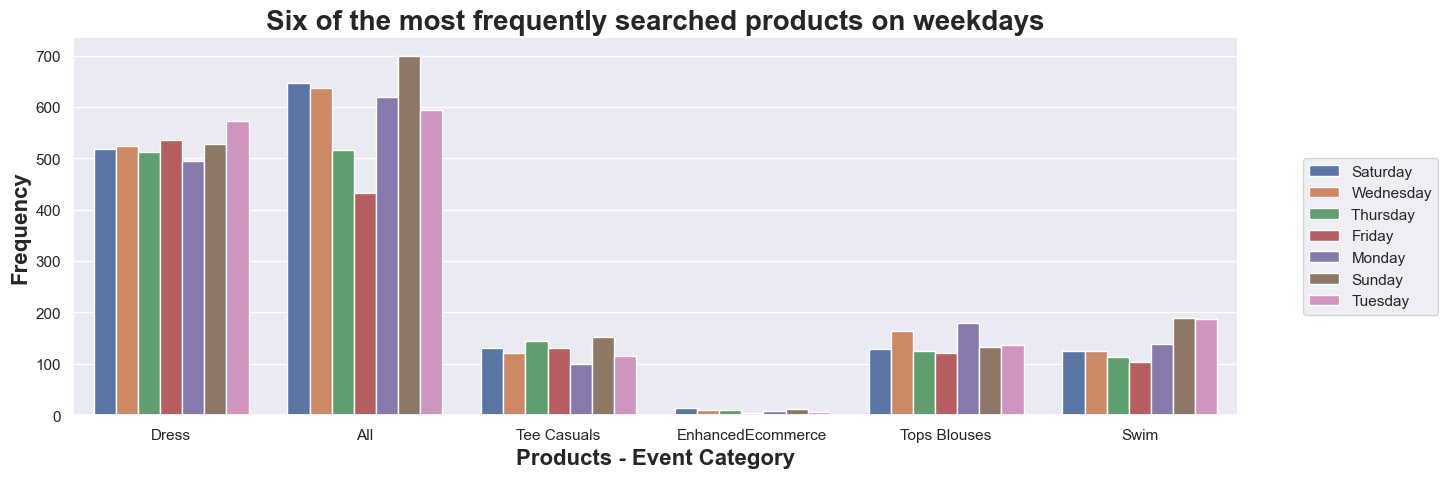

In [86]:
#copy_2 = copy_1.copy()





copy_1['days'].replace(0, 'Sunday', inplace=True)
copy_1['days'].replace(1, 'Saturday', inplace=True)
copy_1['days'].replace(2, 'Monday', inplace=True)
copy_1['days'].replace(3, 'Tuesday', inplace=True)
copy_1['days'].replace(4, 'Wednesday', inplace=True)
copy_1['days'].replace(5, 'Thursday ', inplace=True)
copy_1['days'].replace(6, 'Friday', inplace=True)


import seaborn as sns
plt.figure(figsize = (15,5))
x_2 = sns.countplot(x= www['event.eventCategory'], hue= copy_1['days'])
plt.title('Six of the most frequently searched products on weekdays', fontsize=20, fontweight='bold')
plt.xlabel('Products - Event Category', fontsize=16, fontweight='bold')
plt.ylabel('Frequency', fontsize=16, fontweight='bold')
sns.despine(left=True)
plt.legend(bbox_to_anchor=(1.05, 0.5, 0.3, 0.2), loc='upper left')

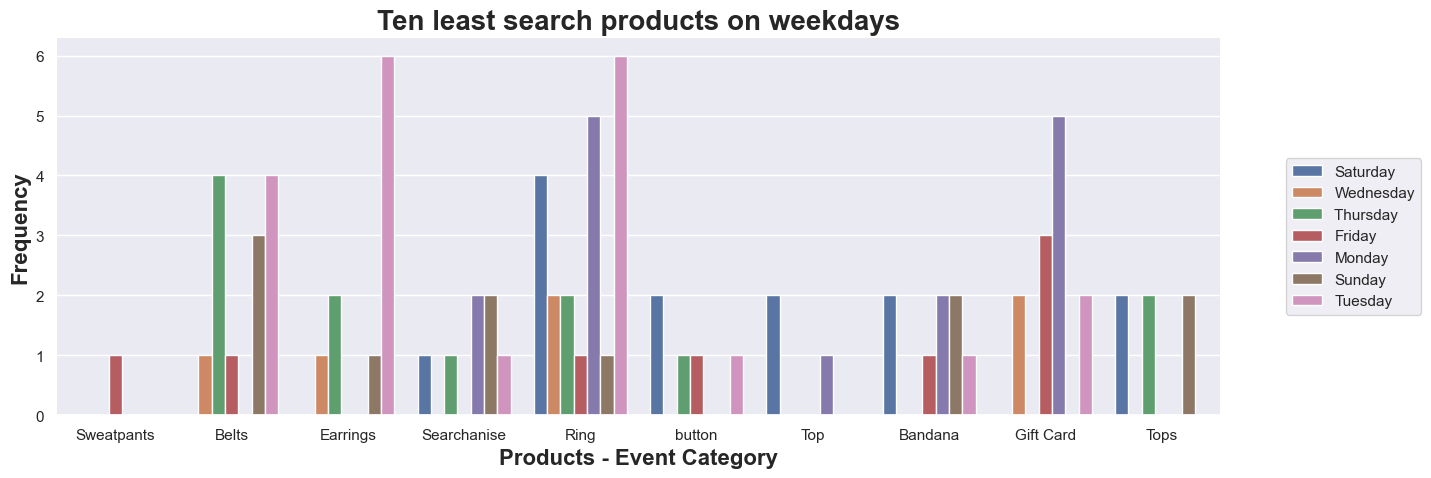

In [87]:
import seaborn as sns
plt.figure(figsize = (15,5))
x_2 = sns.countplot(x= www_323['event.eventCategory'], hue= copy_1['days'])
plt.title('Ten least search products on weekdays', fontsize=20, fontweight='bold')
plt.xlabel('Products - Event Category', fontsize=16, fontweight='bold')
plt.ylabel('Frequency', fontsize=16, fontweight='bold')
sns.despine(left=True)
plt.legend(bbox_to_anchor=(1.05, 0.5, 0.3, 0.2), loc='upper left')

z


In [88]:
#Combine categories of source (from 103 into 17)
m = {"google": ['google'],
     "direct": ['(direct)'],
     "Engaged Segment": ['Engaged Segment'],
     "IGShopping": ['IGShopping'],
     "pinterest": ['ar.pinterest.com','br.pinterest.com','co.pinterest.com','cz.pinterest.com','hu.pinterest.com',
                  'id.pinterest.com', 'in.pinterest.com','nl.pinterest.com','pinterest', 'pinterest.ca','pinterest.ch',
                   'pinterest.cl', 'pinterest.co.kr','pinterest.co.uk', 'pinterest.com', 'pinterest.com.au',
                   'pinterest.de', 'pinterest.dk', 'pinterest.es', 'pinterest.fr','pinterest.ie', 'pinterest.it', 
                   'pinterest.jp', 'pinterest.ph','ro.pinterest.com','tr.pinterest.com','za.pinterest.com'], 
     "facebook": ['Facebook','facebook', 'facebook.com','l.facebook.com','lm.facebook.com','m.facebook.com'],
     "instagram": ['Instagram','instagram', 'instagram.com','l.instagram.com'],
     "Yotpo L&R": ['Yotpo L&R - Redemption Reminder','Yotpo L&R - Referral Share'],
     "DBNY": ['DBNY - ACS Flow', 'DBNY - Hanover St Customers','DBNY - JustUno Lead Capture', 'DBNY - LCS Flow',
             'DBNY - Newbury St Customers'],
     "smsbump": ['smsbump-automations', 'smsbump-campaigns', 'smsbump-flows','smsbump.yotpo.com'],
     "Small Website": ['admin.shidaiapps.com','admin.swatchon.me','bwmwebsites.com','couponbirds.com','couponwcode.com',
                      'dashboard.heycarson.com', 'emotive.lightning.force.com','loveerikadanielle.com',
                      'newenglandwithlove.com','operamediaworks.com','oribi.io','portal.tds.net','pq.pinadmin.com',
                      'rapid.yottaa.com','salesource.io','scenicshopping.com','search.aol.com','shop.app','shopistores',
                      'startpage.com', 'stillwaterthebrand.com', 't.co','ecosia.org'],
     "Email": ['Bounced email','manage.kmail-lists.com', 'mymail.optimum.net','mail.google.com'],
     "litboutique": ['blog.litboutique.com','litboutique.com'],
     "squarespace": ['viola-kazoo-5zjk.squarespace.com','squarespace'],
     "Other Large Website": ['amazon.com', 'apay-us.amazon.com','glassdoor.com','indeed.com','linkedin.com','m.yelp.com',
                             'yelp.com','youtube.com'],
     "Other Search Engine": ['bing','duckduckgo','yahoo'],
     "Other": ['Browse Abandonment','abandoned_cart','ad','boys lie list','klarna','loyalty','sogou','baidu','shop_app']}

m2 = {v: k for k,vv in m.items() for v in vv}
copy['source'] = copy['source'].map(m2).astype("category")

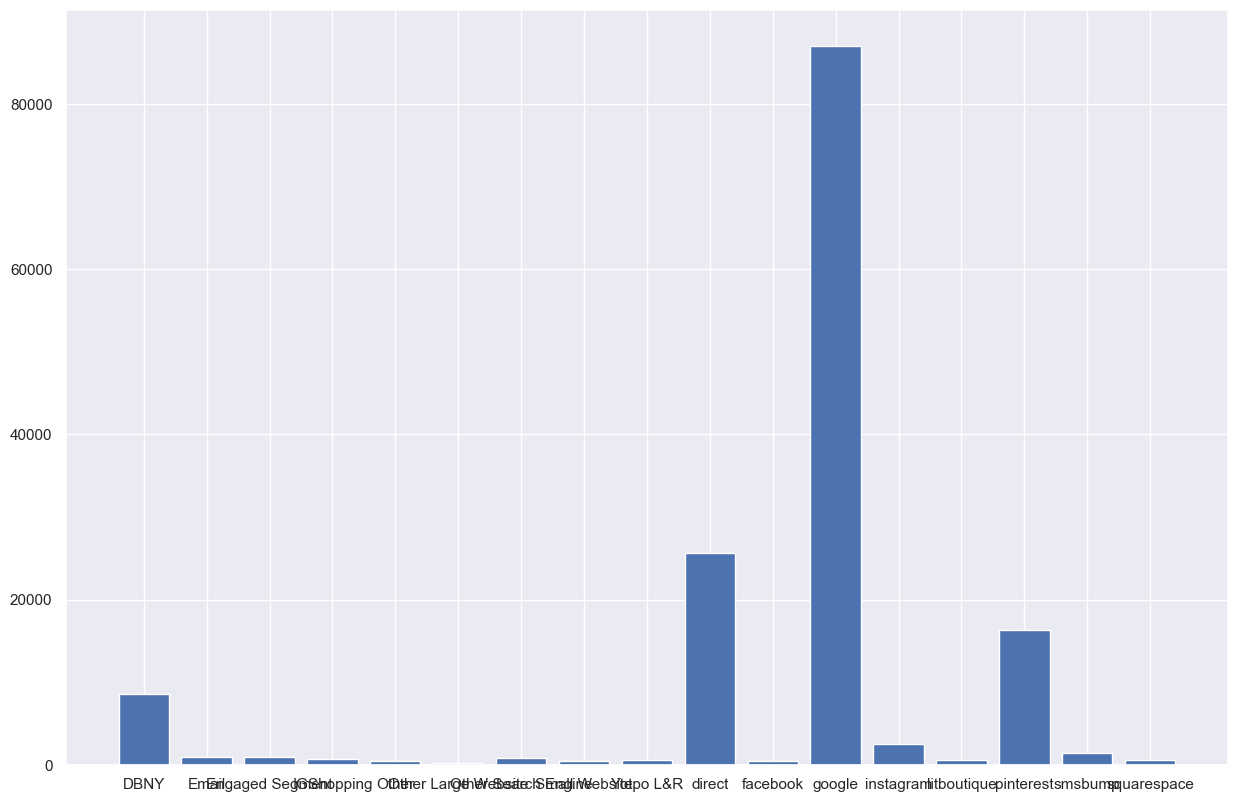

In [89]:
plot_barchart(copy, 'source')

In [90]:
np.unique(copy['campaign'])

array(['(not set)', '20% - 30% Shopping appointment promo (UrNaWa)',
       '4.13 This/That (XD8vex)', '4.23 Spring Events (WehFBE)',
       '80%off holiday blast (XneCip)',
       'Abandoned Cart: Email 1 (HyYcNR)', 'AbandonedCart_2_97784',
       'AbandonedCart_4_97784', 'CP - Dynamic Search Ads tROAS',
       'CP - Smart Shopping - All', 'CP - Smart Shopping - Primary',
       'CP - Smart Shopping - Secondary',
       'CP - US | Shopping | Boys Lie | tROAS',
       'CP - US | Shopping | Dresses | tROAS',
       'CP - US | Shopping | Hats | tROAS',
       'CP - US | Shopping | Jackets & Sweaters | tROAS',
       'CP - US | Shopping | Secondary | tROAS',
       'CP - US | Shopping | Tees | tROAS',
       'CP - US | Shopping | Tertiary | tROAS',
       'CP - US | Shopping | Tops & Blouses | tROAS',
       'Cyber Monday Sun 10pm (T8qtTg)', 'DESERT_-_Social_Opt-in_1802372',
       'Email #1 (KR85KP)', 'Email #1 (Nc8B8N)', 'Email #1 (V3RAtk)',
       'Email #1 (XggZD3)', 'Email #3 (Kq9DtB

['(not set)', 'CP - Dynamic Search Ads tROAS', 'CP - Smart Shopping - All', 'CP - Smart Shopping - Primary', 'CP - Smart Shopping - Secondary', 'Email Campaign 2021-04-07 07:30:06 (XS48UC)', 'Sale Product Drop (TvGS3K)', 'new-arrivals']
[94009, 1361, 24770, 3935, 7084, 1194, 1506, 1777]


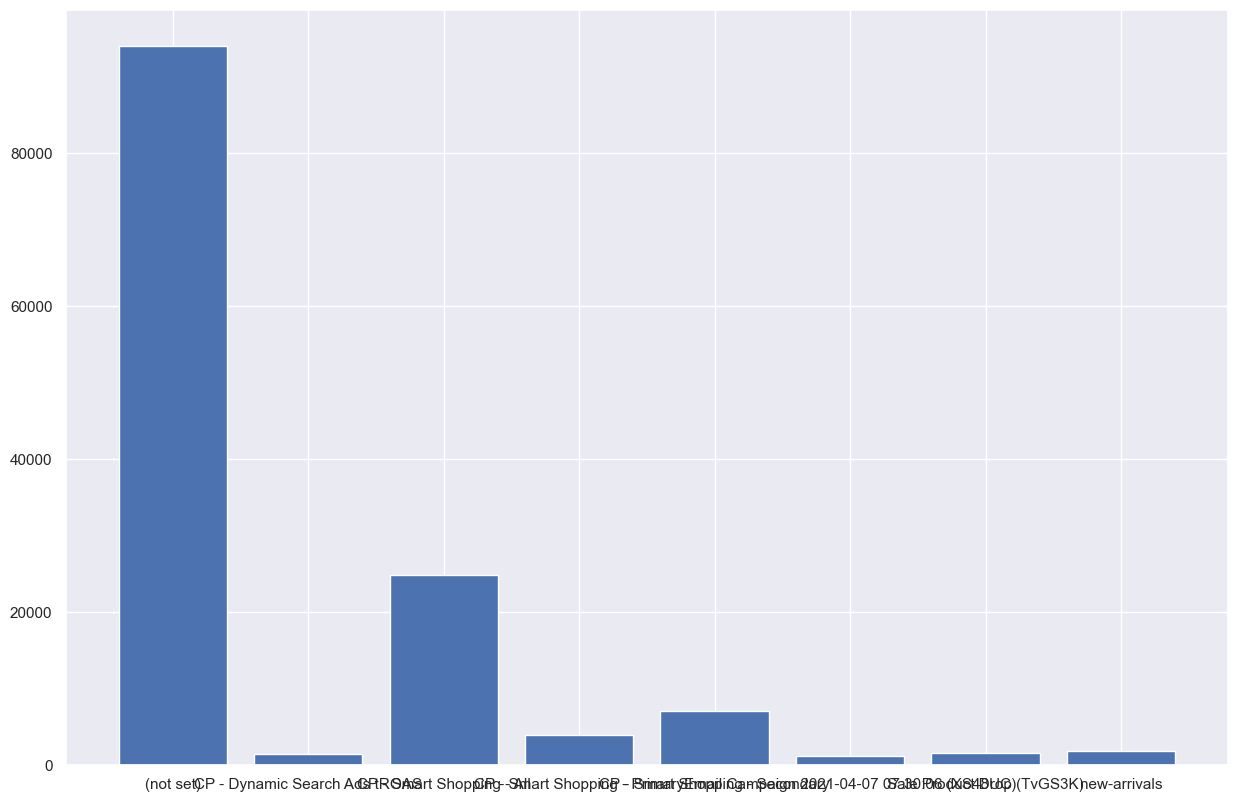

In [91]:
plot_barchart_threshold(copy, 'campaign', 1000)

# TRIAL CODES

In [115]:

copy_1.head()


activityTime source medium channelGrouping  \
0 2021-01-26 17:47:38.685400+00:00      0      0               0   
1 2021-01-26 17:47:32.529986+00:00      0      0               0   
2 2021-01-26 17:47:29.941225+00:00      0      0               0   
3 2021-01-26 17:47:29.941225+00:00      0      0               0   
4 2021-01-26 17:47:29.856545+00:00      0      0               0   

                    campaign               keyword hostname  \
0  CP - Smart Shopping - All  product_type_l1==bra        0   
1  CP - Smart Shopping - All  product_type_l1==bra        0   
2  CP - Smart Shopping - All  product_type_l1==bra        0   
3  CP - Smart Shopping - All  product_type_l1==bra        0   
4  CP - Smart Shopping - All  product_type_l1==bra        0   

                                     landingPagePath activityType  \
0  /products/structured-flex-rib-tank-bra-black?v...            0   
1  /products/structured-flex-rib-tank-bra-black?v...            0   
2  /products/structured-flex-rib-tank-bra-black?v...            1   
3  /products/structured-flex-rib-tank-bra-black?v...            0   
4  /products/structured-flex-rib-tank-bra-black?v...            2   

  sessions.sessionDate sessions.deviceCategory sessions.platform  \
0           2021-01-26                       0                 0   
1           2021-01-26                       0                 0   
2           2021-01-26                       0                 0   
3           2021-01-26                       0                 0   
4           2021-01-26                       0                 0   

  sessions.dataSource  userId days  hours  
0                   0       0    6     17  
1                   0       0    6     17  
2                   0       0    6     17  
3                   0       0    6     17  
4                   0       0    6     17

In [116]:
#Dropping integer columns and columns with too many categories
new_copy_1=copy_1.drop(columns = ['activityTime','sessions.sessionDate', 'keyword', 'landingPagePath', 'userId', 'campaign'])
new_copy_1.head()

source medium channelGrouping hostname activityType sessions.deviceCategory  \
0      0      0               0        0            0                       0   
1      0      0               0        0            0                       0   
2      0      0               0        0            1                       0   
3      0      0               0        0            0                       0   
4      0      0               0        0            2                       0   

  sessions.platform sessions.dataSource days  hours  
0                 0                   0    6     17  
1                 0                   0    6     17  
2                 0                   0    6     17  
3                 0                   0    6     17  
4                 0                   0    6     17

In [117]:
new_copy_1['hostname'].unique()

[0, 1, 2, 3]
Categories (4, int64): [0, 1, 2, 3]

In [118]:
new_copy_1['channelGrouping'].unique()

[0, 1, 2, 3, 4, 5, 6]
Categories (7, int64): [0, 1, 2, 3, 4, 5, 6]

In [119]:
x=new_copy_1['source'].unique()
x.value_counts()

0                        1
pinterest.com            1
(direct)                 1
duckduckgo               1
4                        1
                        ..
shopistores              1
pq.pinadmin.com          1
salesource.io            1
loveerikadanielle.com    1
rapid.yottaa.com         1
Length: 103, dtype: int64

In [120]:
y=new_copy_1['medium'].unique()
y.value_counts()

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
dtype: int64

In [121]:
new_copy_1['activityType'].unique()

[0, 1, 2, 3]
Categories (4, int64): [0, 1, 2, 3]

In [122]:
new_copy_1['sessions.deviceCategory'].unique()


[0, 1, 2]
Categories (3, int64): [0, 1, 2]

In [123]:
new_copy_1['sessions.platform'].unique()

[0, 1, 2, 3, 4, 5, 6, 7]
Categories (8, int64): [0, 1, 2, 3, 4, 5, 6, 7]

In [124]:
new_copy_1['sessions.dataSource'].unique()

[0]
Categories (1, int64): [0]

In [125]:
new_copy_1['days'].unique()

array([6, 3, 'Thursday ', 5, 1, 0, 2], dtype=object)

### Encoding Categorical Characteristics Numeric: <a name="ECCN"></a>

- Before predictive modeling, it is necessary to encode categorical features into numeric

In [126]:
new_copy_1['hostname'].replace('litboutique.com',0,inplace=True)
new_copy_1['hostname'].replace('litboutique.myshopify.com',1,inplace=True)
new_copy_1['hostname'].replace('checkout.shopify.com',2,inplace=True)
new_copy_1['hostname'].replace('litboutique.com.googleweblight.com',3,inplace=True)


new_copy_1['channelGrouping'].replace('Paid Search',0,inplace=True)
new_copy_1['channelGrouping'].replace('Organic Search',1,inplace=True)
new_copy_1['channelGrouping'].replace('Social',2,inplace=True)
new_copy_1['channelGrouping'].replace('Direct',3,inplace=True)
new_copy_1['channelGrouping'].replace('(Other)',4,inplace=True)
new_copy_1['channelGrouping'].replace('Referral',5,inplace=True)
new_copy_1['channelGrouping'].replace('Email',6,inplace=True)


new_copy_1['source'].replace('google',0,inplace=True)
new_copy_1['source'].replace('pinterest',1,inplace=True)
new_copy_1['source'].replace('direct',2,inplace=True)
new_copy_1['source'].replace('Other Search Engine',3,inplace=True)
new_copy_1['source'].replace('facebook',4,inplace=True)
new_copy_1['source'].replace('Email',5,inplace=True)
new_copy_1['source'].replace('Other',6,inplace=True)
new_copy_1['source'].replace('litboutique',7,inplace=True)
new_copy_1['source'].replace('DBNY',8,inplace=True)
new_copy_1['source'].replace('instagram',9,inplace=True)
new_copy_1['source'].replace('Other Large Website',10,inplace=True)
new_copy_1['source'].replace('Engaged Segment',11,inplace=True)
new_copy_1['source'].replace('Yotpo L&R',12,inplace=True)
new_copy_1['source'].replace('smsbump',13,inplace=True)
new_copy_1['source'].replace('Small Website',14,inplace=True)
new_copy_1['source'].replace('IGShopping',15,inplace=True)
new_copy_1['source'].replace('squarespace',16,inplace=True)


new_copy_1['medium'].replace('cpc',0,inplace=True)
new_copy_1['medium'].replace('organic',1,inplace=True)
new_copy_1['medium'].replace('referral',2,inplace=True)
new_copy_1['medium'].replace('(none)',3,inplace=True)
new_copy_1['medium'].replace('(not set)',4,inplace=True)
new_copy_1['medium'].replace('email',5,inplace=True)
new_copy_1['medium'].replace('pin-image',6,inplace=True)
new_copy_1['medium'].replace('lit-story',7,inplace=True)
new_copy_1['medium'].replace('sms',8,inplace=True)
new_copy_1['medium'].replace('Social',9,inplace=True)
new_copy_1['medium'].replace('product_sync',10,inplace=True)
new_copy_1['medium'].replace('lit-bio',11,inplace=True)
new_copy_1['medium'].replace('app',12,inplace=True)
new_copy_1['medium'].replace('pin-video',13,inplace=True)
new_copy_1['medium'].replace('blog',14,inplace=True)
new_copy_1['medium'].replace('lit story',15,inplace=True)
new_copy_1['medium'].replace('story',16,inplace=True)
new_copy_1['medium'].replace('facebook',17,inplace=True)
new_copy_1['medium'].replace('clickthrough',18,inplace=True)





new_copy_1['activityType'].replace('EVENT',0,inplace=True)
new_copy_1['activityType'].replace('ECOMMERCE',1,inplace=True)
new_copy_1['activityType'].replace('PAGEVIEW',2,inplace=True)
new_copy_1['activityType'].replace('GOAL',3,inplace=True)





new_copy_1['sessions.deviceCategory'].replace('desktop',0,inplace=True)
new_copy_1['sessions.deviceCategory'].replace('mobile',1,inplace=True)
new_copy_1['sessions.deviceCategory'].replace('tablet',2,inplace=True)






new_copy_1['sessions.platform'].replace('Macintosh',0,inplace=True)
new_copy_1['sessions.platform'].replace('Android',1,inplace=True)
new_copy_1['sessions.platform'].replace('iOS',2,inplace=True)
new_copy_1['sessions.platform'].replace('Windows',3,inplace=True)
new_copy_1['sessions.platform'].replace('Linux',4,inplace=True)
new_copy_1['sessions.platform'].replace('(not set)',5,inplace=True)
new_copy_1['sessions.platform'].replace('Chrome OS',6,inplace=True)
new_copy_1['sessions.platform'].replace('Windows Phone',7,inplace=True)






new_copy_1['sessions.dataSource'].replace('web',0,inplace=True)




new_copy_1['days'].replace('Sunday',0,inplace=True)
new_copy_1['days'].replace('Monday',1,inplace=True)
new_copy_1['days'].replace('Tuesday',2,inplace=True)
new_copy_1['days'].replace('Wednesday',3,inplace=True)
new_copy_1['days'].replace('Thursday',4,inplace=True)
new_copy_1['days'].replace('Friday',5,inplace=True)
new_copy_1['days'].replace('Saturday',6,inplace=True)


#### Summary Statistics

In [127]:
new_copy_1.describe(include='all')

source    medium  channelGrouping  hostname  activityType  \
count   148475.0  148475.0         148475.0  148475.0      148475.0   
unique     103.0      19.0              7.0       4.0           4.0   
top          0.0       1.0              1.0       0.0           2.0   
freq     87045.0   49714.0          49714.0  147549.0       74142.0   
mean         NaN       NaN              NaN       NaN           NaN   
std          NaN       NaN              NaN       NaN           NaN   
min          NaN       NaN              NaN       NaN           NaN   
25%          NaN       NaN              NaN       NaN           NaN   
50%          NaN       NaN              NaN       NaN           NaN   
75%          NaN       NaN              NaN       NaN           NaN   
max          NaN       NaN              NaN       NaN           NaN   

        sessions.deviceCategory  sessions.platform  sessions.dataSource  \
count                  148475.0           148475.0             148475.0   
unique                      3.0                8.0                  1.0   
top                         1.0                2.0                  0.0   
freq                    98110.0            88199.0             148475.0   
mean                        NaN                NaN                  NaN   
std                         NaN                NaN                  NaN   
min                         NaN                NaN                  NaN   
25%                         NaN                NaN                  NaN   
50%                         NaN                NaN                  NaN   
75%                         NaN                NaN                  NaN   
max                         NaN                NaN                  NaN   

            days          hours  
count   148475.0  148475.000000  
unique       7.0            NaN  
top          0.0            NaN  
freq     23918.0            NaN  
mean         NaN      12.412979  
std          NaN       7.633777  
min          NaN       0.000000  
25%          NaN       4.000000  
50%          NaN      15.000000  
75%          NaN      19.000000  
max          NaN      23.000000

In [128]:
new_copy_1.head()

source medium channelGrouping hostname activityType sessions.deviceCategory  \
0      0      0               0        0            0                       0   
1      0      0               0        0            0                       0   
2      0      0               0        0            1                       0   
3      0      0               0        0            0                       0   
4      0      0               0        0            2                       0   

  sessions.platform sessions.dataSource days  hours  
0                 0                   0    6     17  
1                 0                   0    6     17  
2                 0                   0    6     17  
3                 0                   0    6     17  
4                 0                   0    6     17

In [129]:
Data = new_copy_1.drop(columns='activityType')
target = new_copy_1['activityType']
target.value_counts()

2    74142
0    58014
1    15902
3      417
Name: activityType, dtype: int64

### Encoding the Target Feature
We remove the "activityType" feature from the full dataset and call it "target". The rest of the features are the descriptive features which we call "Data".

Keep in mind that scikit-learn always requires all data to be numeric, so the target needs to be encoded as 0, 1 and so on.

In [130]:
from sklearn import preprocessing

target = preprocessing.LabelEncoder().fit_transform(target)

In [131]:
np.unique(target, return_counts = True)

(array([0, 1, 2, 3]), array([58014, 15902, 74142,   417]))

### Encoding Categorical Descriptive Features

We attempt one-hot encoding since all of the descriptive features appear to be nominal. We also establish q dummy variables for a category descriptive variable with q levels, because we intend to use feature selection. We design a single dummy variable when a category descriptive feature has just two levels. Let us generate a list of categorical descriptive features.

In [132]:
categorical_cols = Data.columns[Data.dtypes==object].tolist()

Before any transformation, the categorical features are as follows.

In [133]:
categorical_cols

['days']

The coding operation is shown below. For each two-level categorical variable, we set the `drop_first` option to `True` to encode the variable into a single column of 0 or 1. Next, we apply the `get_dummies() `function for the regular one-hot encoding for categorical features with more than 2 levels.

In [134]:
for col in categorical_cols:
    n = len(Data[col].unique())
    if (n == 2):
        Data[col] = pd.get_dummies(Data[col], drop_first=True)
   
# use one-hot-encoding for categorical features with >2 levels
Data = pd.get_dummies(Data)

After encoding, the feature set has the following columns.

In [135]:
Data.columns

Index(['hours', 'source_(direct)', 'source_Bounced email',
       'source_Browse Abandonment', 'source_DBNY - ACS Flow',
       'source_DBNY - Hanover St Customers',
       'source_DBNY - JustUno Lead Capture', 'source_DBNY - LCS Flow',
       'source_DBNY - Newbury St Customers', 'source_11',
       ...
       'sessions.platform_7', 'sessions.platform_2', 'sessions.dataSource_0',
       'days_0', 'days_1', 'days_2', 'days_3', 'days_5', 'days_6',
       'days_Thursday '],
      dtype='object', length=153)

In [136]:
Data.sample(5, random_state=999)

hours  source_(direct)  source_Bounced email  \
89901      4                0                     0   
18736      2                0                     0   
43516      2                0                     0   
39398     16                0                     0   
9940      19                1                     0   

       source_Browse Abandonment  source_DBNY - ACS Flow  \
89901                          0                       0   
18736                          0                       0   
43516                          0                       0   
39398                          0                       0   
9940                           0                       0   

       source_DBNY - Hanover St Customers  source_DBNY - JustUno Lead Capture  \
89901                                   0                                   0   
18736                                   0                                   0   
43516                                   0                                   0   
39398                                   0                                   0   
9940                                    0                                   0   

       source_DBNY - LCS Flow  source_DBNY - Newbury St Customers  source_11  \
89901                       0                                   0          0   
18736                       0                                   0          0   
43516                       0                                   0          0   
39398                       0                                   0          0   
9940                        0                                   0          0   

       ...  sessions.platform_7  sessions.platform_2  sessions.dataSource_0  \
89901  ...                    0                    1                      1   
18736  ...                    0                    1                      1   
43516  ...                    0                    0                      1   
39398  ...                    0                    1                      1   
9940   ...                    0                    1                      1   

       days_0  days_1  days_2  days_3  days_5  days_6  days_Thursday   
89901       0       0       0       0       0       1               0  
18736       0       0       0       0       1       0               0  
43516       0       0       1       0       0       0               0  
39398       0       0       1       0       0       0               0  
9940        1       0       0       0       0       0               0  

[5 rows x 153 columns]

### Scaling of Features
After encoding all the categorical features, we perform a min-max scaling of the descriptive features. But first we make a copy of the Data to keep track of column names.

In [137]:
from sklearn import preprocessing

Data_df = Data.copy()

Data_scaler = preprocessing.MinMaxScaler()
Data_scaler.fit(Data)
Data = Data_scaler.fit_transform(Data)

Let's have another look at the descriptive features after scaling. Pay attention that the output of the scaler is a NumPy array, so all the column names are lost. That's why we kept a copy of Data before scaling so that we can recover the column names below. We observe below that binary features are still kept as binary after the min-max scaling.

In [138]:
new_copy_1_df=pd.DataFrame(Data, columns=Data_df.columns).sample(5, random_state=999)
new_copy_1_df

hours  source_(direct)  source_Bounced email  \
89901  0.173913              0.0                   0.0   
18736  0.086957              0.0                   0.0   
43516  0.086957              0.0                   0.0   
39398  0.695652              0.0                   0.0   
9940   0.826087              1.0                   0.0   

       source_Browse Abandonment  source_DBNY - ACS Flow  \
89901                        0.0                     0.0   
18736                        0.0                     0.0   
43516                        0.0                     0.0   
39398                        0.0                     0.0   
9940                         0.0                     0.0   

       source_DBNY - Hanover St Customers  source_DBNY - JustUno Lead Capture  \
89901                                 0.0                                 0.0   
18736                                 0.0                                 0.0   
43516                                 0.0                                 0.0   
39398                                 0.0                                 0.0   
9940                                  0.0                                 0.0   

       source_DBNY - LCS Flow  source_DBNY - Newbury St Customers  source_11  \
89901                     0.0                                 0.0        0.0   
18736                     0.0                                 0.0        0.0   
43516                     0.0                                 0.0        0.0   
39398                     0.0                                 0.0        0.0   
9940                      0.0                                 0.0        0.0   

       ...  sessions.platform_7  sessions.platform_2  sessions.dataSource_0  \
89901  ...                  0.0                  1.0                    0.0   
18736  ...                  0.0                  1.0                    0.0   
43516  ...                  0.0                  0.0                    0.0   
39398  ...                  0.0                  1.0                    0.0   
9940   ...                  0.0                  1.0                    0.0   

       days_0  days_1  days_2  days_3  days_5  days_6  days_Thursday   
89901     0.0     0.0     0.0     0.0     0.0     1.0             0.0  
18736     0.0     0.0     0.0     0.0     1.0     0.0             0.0  
43516     0.0     0.0     1.0     0.0     0.0     0.0             0.0  
39398     0.0     0.0     1.0     0.0     0.0     0.0             0.0  
9940      1.0     0.0     0.0     0.0     0.0     0.0             0.0  

[5 rows x 153 columns]

# Predictive Modelling <a name="PPM"></a>

### Feature Selection <a name="FFS"></a>



In [153]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn import feature_selection as fs
from sklearn.tree import DecisionTreeClassifier

In [167]:
clf = DecisionTreeClassifier(random_state=999)
scoring_metric = 'accuracy'
cv_method = RepeatedStratifiedKFold(n_splits=10, 
                                     n_repeats=3,
                                     random_state=999)

### RandomForestClassifier

In [139]:
num_features = 10
from sklearn.ensemble import RandomForestClassifier
model_rfi = RandomForestClassifier(n_estimators=100)
model_rfi.fit(Data, target)
fs_indices_rfi = np.argsort(model_rfi.feature_importances_)[::-1][0:num_features]

In [141]:
best_features_rfi = new_copy_1_df.columns[fs_indices_rfi].values
best_features_rfi

array(['hours', 'channelGrouping_0', 'medium_0', 'days_6', 'days_3',
       'days_0', 'days_1', 'days_2', 'sessions.platform_5',
       'days_Thursday '], dtype=object)

These are the best features selected by the Random Forest Importance method

In [142]:
feature_importances_rfi = model_rfi.feature_importances_[fs_indices_rfi]
feature_importances_rfi

array([0.58587882, 0.02793533, 0.0179222 , 0.01764536, 0.01691995,
       0.01620952, 0.0158364 , 0.01520784, 0.01455728, 0.01455611])

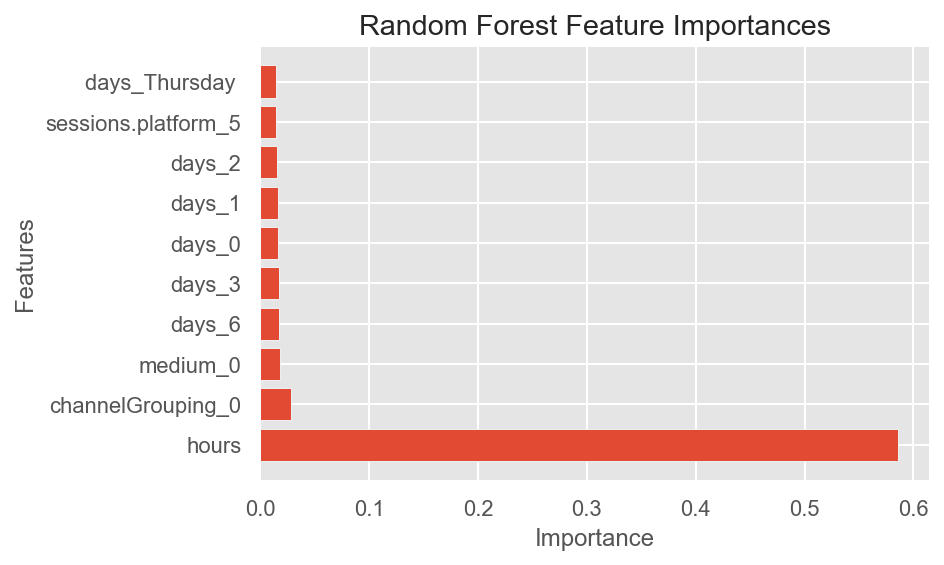

In [143]:
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

def plot_imp(best_features, scores, method_name):   
    plt.barh(best_features, scores)
    plt.title(method_name + ' Feature Importances')
    plt.xlabel("Importance")
    plt.ylabel("Features")
    
plot_imp(best_features_rfi, feature_importances_rfi, 'Random Forest')

We find that hours is the most important feature, followed by channelGrouping_0, medium_0, days_6 etc.
NOTE: channelGrouping_0 = Paid Search, medium_0 = cpc and days_6 = Saturday. 

Now let's evaluate the performance of these features.

In [168]:
cv_results_rfi = cross_val_score(estimator=clf,
                             X=Data[:, fs_indices_rfi],
                             y=target, 
                             cv=cv_method, 
                             scoring=scoring_metric)
cv_results_rfi.mean().round(3)

0.497

### Feature Selection Using F-Score

In [177]:
from sklearn import feature_selection as fs
num_features = 10
fs_fit_fscore = fs.SelectKBest(fs.f_classif, k=num_features)
fs_fit_fscore.fit_transform(Data, target)
fs_indices_fscore = np.argsort(np.nan_to_num(fs_fit_fscore.scores_))[::-1][0:num_features]
fs_indices_fscore

/Users/zuaibshaikh/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [145] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/Users/zuaibshaikh/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


array([127, 110, 116, 126,  69, 129, 124, 104,   1, 135])

In [178]:
best_features_fscore = new_copy_1_df.columns[fs_indices_fscore].values
best_features_fscore

array(['channelGrouping_0', 'medium_0', 'medium_1', 'channelGrouping_1',
       'source_pinterest.com', 'channelGrouping_2', 'channelGrouping_3',
       'medium_3', 'source_(direct)', 'sessions.deviceCategory_1'],
      dtype=object)

These are the best features selected by the F-Score method

In [179]:
feature_importances_fscore = fs_fit_fscore.scores_[fs_indices_fscore]
feature_importances_fscore

array([352.43851164, 352.43851164, 143.15396836, 143.15396836,
       142.54719559, 111.77582794,  87.71593456,  87.71593456,
        87.71593456,  80.8378771 ])

In [180]:
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

def plot_imp(best_features, scores, method_name):   
    plt.barh(best_features, scores)
    plt.title(method_name + ' Feature Importances')
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()

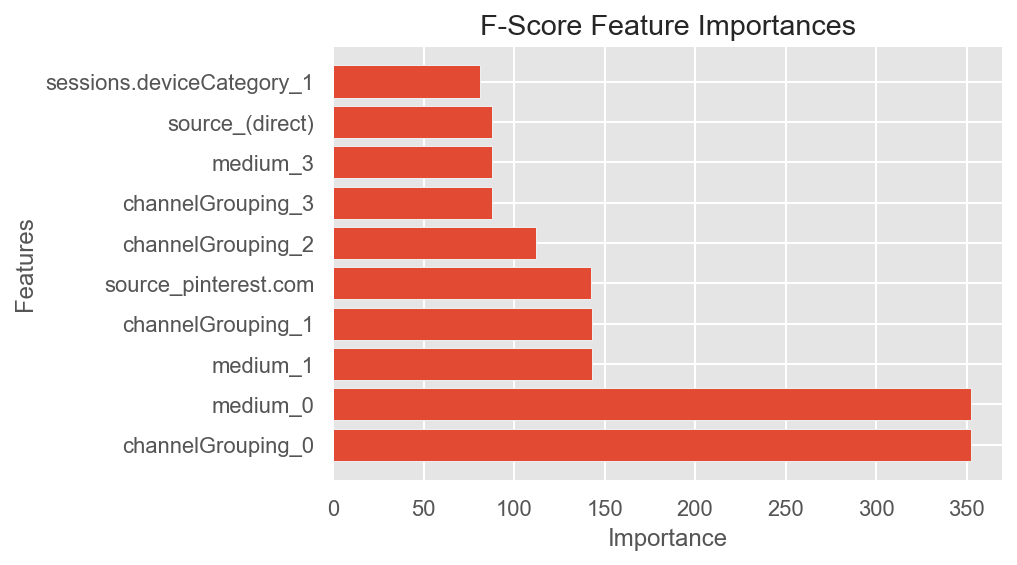

In [181]:
plot_imp(best_features_fscore, feature_importances_fscore, 'F-Score')

We find that channelGrouping_0 is the most important feature, followed by medium_0, medium_1 etc.
NOTE: channelGrouping_0 = Paid Search, medium_0 = cpc and medium_1 = organic. 

Now let's evaluate the performance of these features.

In [182]:
cv_results_fscore = cross_val_score(estimator=clf,
                             X=Data[:, fs_indices_fscore],
                             y=target, 
                             cv=cv_method, 
                             scoring=scoring_metric)
cv_results_fscore.mean().round(3)

0.499

### Feature Selection Using Mutual Information

In [173]:
fs_fit_mutual_info = fs.SelectKBest(fs.mutual_info_classif, k=num_features)
fs_fit_mutual_info.fit_transform(Data, target)
fs_indices_mutual_info = np.argsort(fs_fit_mutual_info.scores_)[::-1][0:num_features]
best_features_mutual_info = new_copy_1_df.columns[fs_indices_mutual_info].values
best_features_mutual_info

array(['hostname_0', 'sessions.platform_2', 'medium_0', 'source_0',
       'sessions.deviceCategory_1', 'source_DBNY - LCS Flow',
       'source_scenicshopping.com', 'medium_3', 'medium_1',
       'source_pinterest.com'], dtype=object)

These are the best features selected by the F-Score method

In [174]:
feature_importances_mutual_info = fs_fit_mutual_info.scores_[fs_indices_mutual_info]
feature_importances_mutual_info

array([0.0138371 , 0.00515138, 0.00465739, 0.00432738, 0.0042408 ,
       0.00411259, 0.00410146, 0.00350118, 0.0029562 , 0.00286129])

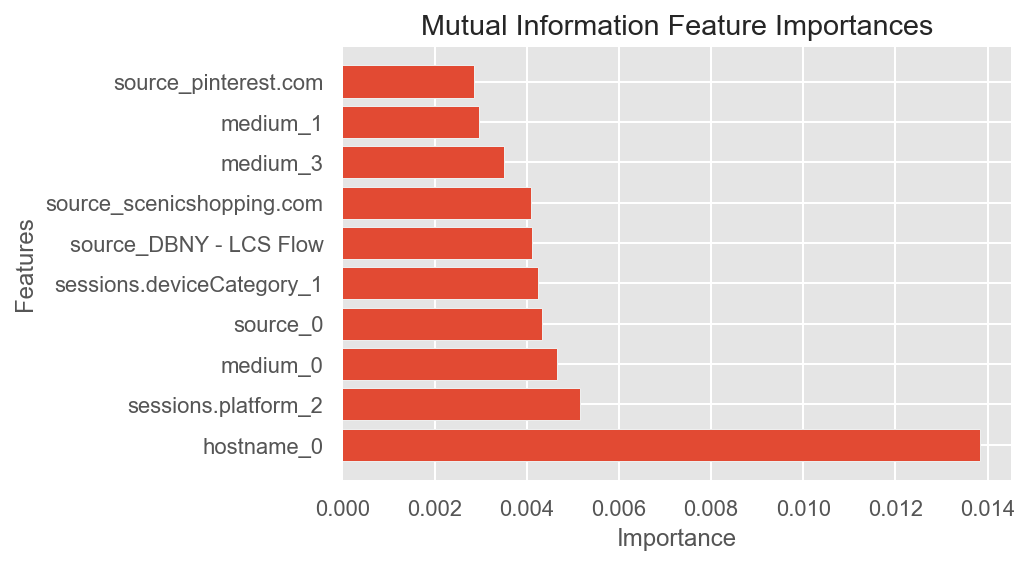

In [175]:
plot_imp(best_features_mutual_info, feature_importances_mutual_info, 'Mutual Information')

We find that hostname_0 is the most important feature, followed by sessions.deviceCategory_1, sessions.platform_2 etc.
NOTE: hostname_0 = litboutique.com, sessions.deviceCategory_1 = mobile and sessions.platform_2 = iOS. 

Now let's evaluate the performance of these features.

In [176]:
cv_results_mutual_info = cross_val_score(estimator=clf,
                             X=Data[:, fs_indices_mutual_info],
                             y=target, 
                             cv=cv_method, 
                             scoring=scoring_metric)
cv_results_mutual_info.mean().round(3)

0.499

### Feature Selection Using spFSR

In [184]:
#from spFSR import SpFSR

# set the engine parameters
# pred_type needs to be 'c' for classification and 'r' for regression datasets
#sp_engine = SpFSR(x=Data, y=target, pred_type='c', wrapper=clf, scoring='accuracy')

In [ ]:
#np.random.seed(999)
#sp_output = sp_engine.run(num_features=num_features).results

In [ ]:
#fs_indices_spsa = sp_output.get('selected_features')
#fs_indices_spsa

In [ ]:
#best_features_spsa = cancer_df.columns[fs_indices_spsa]
#best_features_spsa

In [ ]:
#feature_importances_spsa = sp_output.get('selected_ft_importance')
#feature_importances_spsa

In [ ]:
#plot_imp(best_features_spsa, feature_importances_spsa, 'SPSA')

In [ ]:
#Finally, let's evaluate the performance of the SPSA feature selection method.

In [ ]:
#cv_results_spsa = cross_val_score(estimator=clf,
 #                            X=Data[:, fs_indices_spsa],
 #                            y=target, 
 #                            cv=cv_method, 
  #                           scoring=scoring_metric)
#cv_results_spsa.mean().round(3)

## Data Sampling & Train-Test Splitting
We split the descriptive features and the target feature into a training set and a test set by a ratio of 70:30. That is, we use 70% of the data to build our classifiers and evaluate their performance on the remaining 30% of the data. It is is to ensure that we measure model performance on unseen data to avoid overfitting. We also set a random state value so that we can replicate our results later on.

In [185]:
from sklearn.model_selection import train_test_split

D_train, D_test, t_train, t_test = train_test_split(Data, 
                                                    target, 
                                                    test_size = 0.3,
                                                    random_state=999)

print(D_train.shape)
print(D_test.shape)

(103932, 153)
(44543, 153)


## Model Fitting & Tuning <a name="MMFTT"></a>

In [192]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
cv_method = StratifiedKFold(n_splits=5, shuffle=True, random_state=999)

Here we will train our data with a 5-fold stratified cross-validation for hyperparameter tuning and use it for prediction on test data 


## Hyperparameter Tuning 
### K-Nearest Neighbors (KNN)

- We will use pipeline to stack feature selection and grid search for KNN hyperparameter tuning
- KNN parameters will n_neighbors (no. of neighbors) and p (distance metric)

In [193]:
from sklearn.base import BaseEstimator, TransformerMixin

# custom function for RFI feature selection inside a pipeline
# here we use n_estimators=100
class RFIFeatureSelector(BaseEstimator, TransformerMixin):
    
    # class constructor 
    # make sure class attributes end with a "_"
    # per scikit-learn convention to avoid errors
    def __init__(self, n_features_=10):
        self.n_features_ = n_features_
        self.fs_indices_ = None

    # override the fit function
    def fit(self, X, y):
        from sklearn.ensemble import RandomForestClassifier
        from numpy import argsort
        model_rfi = RandomForestClassifier(n_estimators=100)
        model_rfi.fit(X, y)
        self.fs_indices_ = argsort(model_rfi.feature_importances_)[::-1][0:self.n_features_] 
        return self 
    
    # override the transform function
    def transform(self, X, y=None):
        return X[:, self.fs_indices_]

In [194]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

pipe_KNN = Pipeline(steps=[('rfi_fs', RFIFeatureSelector()), 
                           ('knn', KNeighborsClassifier())])

params_pipe_KNN = {'rfi_fs__n_features_': [2,4,6,8,10, Data.shape[1]],
                   'knn__n_neighbors': [1, 5, 10, 15, 20],
                   'knn__p': [1,2,5]}

gs_pipe_KNN = GridSearchCV(estimator=pipe_KNN, 
                           param_grid=params_pipe_KNN, 
                           cv=cv_method,
                           refit=True,
                           n_jobs=-2,
                           scoring='roc_auc',
                           verbose=1) 

In [195]:
gs_pipe_KNN.fit(D_train, t_train);

Fitting 5 folds for each of 90 candidates, totalling 450 fits


/Users/zuaibshaikh/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


In [196]:
gs_pipe_KNN.best_params_

{'knn__n_neighbors': 1, 'knn__p': 1, 'rfi_fs__n_features_': 2}

In [197]:
gs_pipe_KNN.best_score_

nan

- Mean AUC score of the KNN model = nan.
- The model selected 2 features with 1 n_neighbors with Manhattan distance (p=1)

- We will look at other combinations to see if the difference is significant or not. 
- Hence, we will make use of the function below to format the grid search outputs as a Pandas data frame.

In [198]:
# custom function to format the search results as a Pandas data frame
def get_search_results(gs):

    def model_result(scores, params):
        scores = {'mean_score': np.mean(scores),
             'std_score': np.std(scores),
             'min_score': np.min(scores),
             'max_score': np.max(scores)}
        return pd.Series({**params,**scores})

    models = []
    scores = []

    for i in range(gs.n_splits_):
        key = f"split{i}_test_score"
        r = gs.cv_results_[key]        
        scores.append(r.reshape(-1,1))

    all_scores = np.hstack(scores)
    for p, s in zip(gs.cv_results_['params'], all_scores):
        models.append((model_result(s, p)))

    pipe_results = pd.concat(models, axis=1).T.sort_values(['mean_score'], ascending=False)

    columns_first = ['mean_score', 'std_score', 'max_score', 'min_score']
    columns = columns_first + [c for c in pipe_results.columns if c not in columns_first]

    return pipe_results[columns]

In [199]:
results_KNN = get_search_results(gs_pipe_KNN)
results_KNN.head()

mean_score  std_score  max_score  min_score  knn__n_neighbors  knn__p  \
0         NaN        NaN        NaN        NaN               1.0     1.0   
1         NaN        NaN        NaN        NaN               1.0     1.0   
2         NaN        NaN        NaN        NaN               1.0     1.0   
3         NaN        NaN        NaN        NaN               1.0     1.0   
4         NaN        NaN        NaN        NaN               1.0     1.0   

   rfi_fs__n_features_  
0                  2.0  
1                  4.0  
2                  6.0  
3                  8.0  
4                 10.0

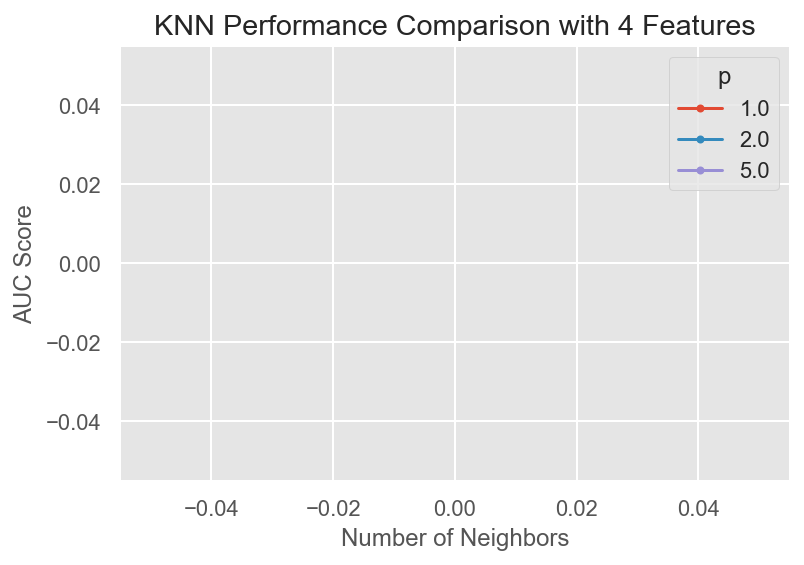

In [200]:
results_KNN_4_features = results_KNN[results_KNN['rfi_fs__n_features_'] == 4]

for i in results_KNN_4_features['knn__p'].unique():
    temp = results_KNN_4_features[results_KNN_4_features['knn__p'] == i]
    plt.plot(temp['knn__n_neighbors'], temp['mean_score'], marker = '.', label = i)
    
plt.legend(title = "p")
plt.xlabel('Number of Neighbors')
plt.ylabel("AUC Score")
plt.title("KNN Performance Comparison with 4 Features")
plt.show()

### (Gaussian) Naive Bayes (NB)

In [201]:
from sklearn.preprocessing import PowerTransformer
D_train_transformed = PowerTransformer().fit_transform(D_train)

/Users/zuaibshaikh/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [202]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV

pipe_NB = Pipeline([('rfi_fs', RFIFeatureSelector()), 
                     ('nb', GaussianNB())])

params_pipe_NB = {'rfi_fs__n_features_': [2,4,6,8,10, Data.shape[1]],
                  'nb__var_smoothing': np.logspace(1,-3, num=200)}

n_iter_search = 200
gs_pipe_NB = RandomizedSearchCV(estimator=pipe_NB, 
                          param_distributions=params_pipe_NB, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-2,
                          scoring='roc_auc',
                          n_iter=n_iter_search,
                          verbose=1) 

gs_pipe_NB.fit(D_train_transformed, t_train);

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


/Users/zuaibshaikh/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
  warnings.warn(


In [203]:
gs_pipe_NB.best_params_

{'rfi_fs__n_features_': 6, 'nb__var_smoothing': 2.7364399970746707}

In [204]:
gs_pipe_NB.best_score_

nan

- The mean AUC score of NB is nan.


In [206]:
results_NB = get_search_results(gs_pipe_NB)
results_NB.head()

mean_score  std_score  max_score  min_score  rfi_fs__n_features_  \
0         NaN        NaN        NaN        NaN                  6.0   
1         NaN        NaN        NaN        NaN                  6.0   
2         NaN        NaN        NaN        NaN                  4.0   
3         NaN        NaN        NaN        NaN                 10.0   
4         NaN        NaN        NaN        NaN                  2.0   

   nb__var_smoothing  
0           2.736440  
1           0.025529  
2           0.017629  
3           0.357079  
4           0.682607

Let's visualize the search results.

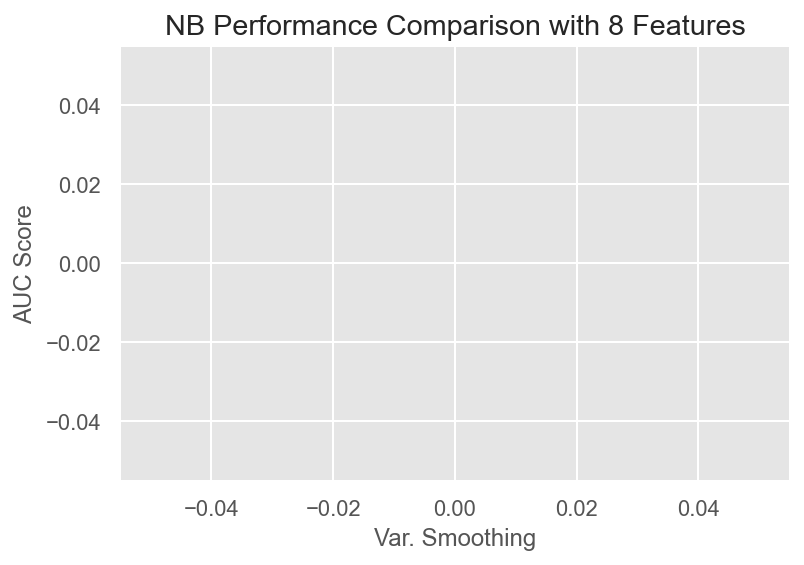

In [208]:
results_NB_8_features = results_NB[results_NB['rfi_fs__n_features_'] == 6].sort_values('nb__var_smoothing')

plt.plot(results_NB_8_features['nb__var_smoothing'], results_NB_8_features['mean_score'], marker = '.', label = i)    
plt.xlabel('Var. Smoothing')
plt.ylabel("AUC Score")
plt.title("NB Performance Comparison with 8 Features")
plt.show()

### Decision Trees (DT)

In [209]:
from sklearn.tree import DecisionTreeClassifier

pipe_DT = Pipeline([('rfi_fs', RFIFeatureSelector()),
                    ('dt', DecisionTreeClassifier(criterion='entropy', random_state=111))])

params_pipe_DT = {'rfi_fs__n_features_': [2,4,6,8,10, Data.shape[1]],
                  'dt__max_depth': [3, 4, 5],
                  'dt__min_samples_split': [2, 5]}

gs_pipe_DT = GridSearchCV(estimator=pipe_DT, 
                          param_grid=params_pipe_DT, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-2,
                          scoring='roc_auc',
                          verbose=1) 

gs_pipe_DT.fit(D_train, t_train);

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/Users/zuaibshaikh/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


In [210]:
gs_pipe_DT.best_params_

{'dt__max_depth': 3, 'dt__min_samples_split': 2, 'rfi_fs__n_features_': 2}

In [211]:
gs_pipe_DT.best_score_


nan

In [212]:
results_DT = get_search_results(gs_pipe_DT)
results_DT.head()

mean_score  std_score  max_score  min_score  dt__max_depth  \
0         NaN        NaN        NaN        NaN            3.0   
1         NaN        NaN        NaN        NaN            3.0   
2         NaN        NaN        NaN        NaN            3.0   
3         NaN        NaN        NaN        NaN            3.0   
4         NaN        NaN        NaN        NaN            3.0   

   dt__min_samples_split  rfi_fs__n_features_  
0                    2.0                  2.0  
1                    2.0                  4.0  
2                    2.0                  6.0  
3                    2.0                  8.0  
4                    2.0                 10.0

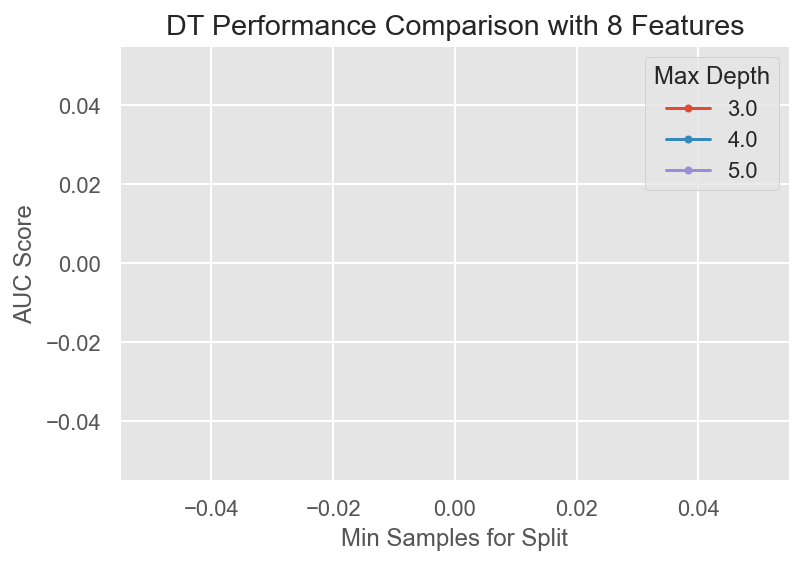

In [213]:
results_DT = get_search_results(gs_pipe_DT)
results_DT_8_features = results_DT[results_DT['rfi_fs__n_features_'] == 2]


for i in results_DT_8_features['dt__max_depth'].unique():
    temp = results_DT_8_features[results_DT_8_features['dt__max_depth'] == i]
    plt.plot(temp['dt__min_samples_split'], temp['mean_score'], marker = '.', label = i)
    
plt.legend(title = "Max Depth")
plt.xlabel('Min Samples for Split')
plt.ylabel("AUC Score")
plt.title("DT Performance Comparison with 8 Features")
plt.show()

## One-hot encode categorical variables

In [ ]:
from sklearn.preprocessing import OneHotEncoder
#Dropping integer columns and columns with too many categories
to_encode = copy.drop(columns = ['activityTime', 'sessions.sessionDate', 'keyword', 'landingPagePath', 'userId', 'campaign'])
onehot = OneHotEncoder()
cluster_data = onehot.fit_transform(to_encode)

In [ ]:
cluster_data

In [ ]:
#K-means
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans()
kmeans.fit(cluster_data)
kmeans.cluster_centers_

In [ ]:
#TODO: 
#Include weekday and hour in cluster_data
#Combine some of the categories in campaign
#Combine a lot of the categories in keyword and landingPagePath (can't be done manually)
#Use clustering to specifically group users together - we may have to use modes
#Use clustering or association rules to find commonly bought together products (use ecommerce_products data)

# TRIAL Codes

In [ ]:
# Just for INFORMATION
# Bottom 10
# Filtering event category to check its actions

In [ ]:
#event_1.loc[event_1['event.eventCategory'] == "Sweatpants"]

In [ ]:
#event_1.loc[event_1['event.eventCategory'] == "Top"]


In [ ]:
#event_1.loc[event_1['event.eventCategory'] == "button"]


In [ ]:
#event_1.loc[event_1['event.eventCategory'] == "Tops"]


In [ ]:
#event_1.loc[event_1['event.eventCategory'] == "Searchanise"]


In [ ]:
#event_1.loc[event_1['event.eventCategory'] == "Bandana"]


In [ ]:
#event_1.loc[event_1['event.eventCategory'] == "Earrings"]


In [ ]:
#event_1.loc[event_1['event.eventCategory'] == "Gift Card"]


In [ ]:
#event_1.loc[event_1['event.eventCategory'] == "Belts"]


In [ ]:
#event_1.loc[event_1['event.eventCategory'] == "Ring"]

In [ ]:
#'Viewed Product, Added Product, click' ---- These are the actions

In [ ]:
# # Top 7
# Filtering event category to check its actions
#event_1.loc[event_1['event.eventCategory'] == "Tee Casuals"]

In [ ]:
#event_1.loc[event_1['event.eventCategory'] == "Swim"]

In [ ]:
#event_1.loc[event_1['event.eventCategory'] == "Tops Blouses"]

In [ ]:
#event_1.loc[event_1['event.eventCategory'] == "EnhancedEcommerce"]

In [ ]:
#event_1.loc[event_1['event.eventCategory'] == "Dress"]

In [ ]:
#event_1.loc[event_1['event.eventCategory'] == "All"]

In [ ]:
#event_1.loc[event_1['event.eventCategory'] == "Justuno"]

In [ ]:
# These are the action
#Targeted Overlay, Viewed Orders - Thank You Page, Engagement - Incentivized Form, Tab Click,Viewed Product, Completedorder, started order,

In [ ]:
#bb=event_1.loc[event_1['event.eventCategory'] == "Top"]
#bb

In [ ]:
#bb['event.eventAction'].value_counts()

# EVENT 

In [ ]:
#event_1['event.eventCategory'].value_counts()


In [ ]:
#event_1['event.eventAction'].value_counts()

In [ ]:
#'Viewed Product','Added Product','Completed Order','visit ' 

In [ ]:
# top 5 product vs top 5 actions
#import seaborn as sns
#plt.figure(figsize = (15,5))
#x_1 = sns.countplot(x= www['event.eventCategory'], hue= copy['activityType'])
#sns.despine(left=True)
#plt.legend(bbox_to_anchor=(1.05, 0.5, 0.3, 0.2), loc='upper left')

In [ ]:
#dff=event_1.loc[event_1['event.eventCategory'].isin(['Tops Blouses','Enhanced Ecommerece','Dress','All','Justuno'])]
#dff

In [ ]:
#diff_1=pd.crosstab(dff['event.eventCategory'],event_1['event.eventAction'])
#diff_1

In [ ]:
#event_1.shape

In [ ]:
#event_11=event_1.drop_duplicates(subset='event.eventCategory')

In [ ]:
#event_22=event_1.drop_duplicates(subset="event.eventAction")

In [ ]:
#event_11.shape

In [ ]:
#event_22.shape

In [ ]:
#event_final=[event_11,event_22]
#event_final.head(10)

In [ ]:
#event_1.loc[event.eventCategory]

In [ ]:
#unique_days = np.unique(copy['days'])
#unique_days

#copy_1= copy.loc[copy['days'].isin([0,1,2,3,4,5,6])]
#copy_1.head

#dd = pd.DataFrame({'days': [0,1,2,3,4,5,6]}) 
#dd